<img src="images/logoUB.svg"  style="max-width:20%">

# Final project Machine Learning 2019-2020
#### Master in Innovation and Entrepreneurship in Biomedical Engineering
###### Authors: Arantxa Palma Rotaeche, Mónica Tuta

<center>
<h4>
    Heart disease binary classification from clinical data - Modeling
    </h4> 
<img src="images/heartDesease.jpg"  style="max-width:30%">
</center>

<h5>General workflow</h5>
This notebook covers from each attempt in the following diagram <br>
The previous steps are found in the notebook <b>01_Visualization.ipynb</b><br>
    <center>
<img src="images/newFlowDiagram.png"  style="max-width:50%">
    </center>

## Contents
1. [Upload data](#ud)
1. [Data description](#dd)
1. [Data exploration and preprocessing](#de)
    1. Dummies for categorical data
    1. Splitting data
    1. Data normalization
    1. Dimensionality reduction - PCA
    1. Linear Discriminant Analysis (LDA)
1. [Modeling](#mo)
    1. KNN
    1. Naïve Bayes
    1. Logistic regression
    1. Decission trees
    1. Random Forest
    1. SVM
1. Conclusions (Summary)

#### Packages

In [1]:
#Load libraries

library(ggpubr)
suppressMessages(library(tidyverse))
library(Hmisc)
library(corrplot)
library(purrr)
library(tidyr)
#Libraries for plots
library(ggplot2)
library(repr)
library(dplyr)
library(gridExtra)
#Library for dummy variables
library(dummies)
#Libraries for feature selection
library("Boruta")
library("mlbench")
library("caret")
#Library for LDA
library("MASS")
#Library for KNN
library(class)
#Libraries for Decision trees
library(rpart)
library(rpart.plot)
#Library for SVM and Naive Bayes
library(e1071)
#Library for ROC and AUC
library("pROC")

Loading required package: ggplot2


Loading required package: lattice


Loading required package: survival


Loading required package: Formula



Attaching package: ‘Hmisc’



The following objects are masked from ‘package:dplyr’:

    src, summarize



The following objects are masked from ‘package:base’:

    format.pval, units



corrplot 0.84 loaded



Attaching package: ‘gridExtra’



The following object is masked from ‘package:dplyr’:

    combine



dummies-1.5.6 provided by Decision Patterns




Attaching package: ‘caret’



The following object is masked from ‘package:survival’:

    cluster



The following object is masked from ‘package:purrr’:

    lift




Attaching package: ‘MASS’



The following object is masked from ‘package:dplyr’:

    select




Attaching package: ‘e1071’



The following object is masked from ‘package:Hmisc’:

    impute



Type 'citation("pROC")' for a citation.



Attaching package: ‘pROC’



The following objects are masked from ‘package:stats’:

    cov, smooth, var



### Upload Data <a class="anchor" id="ud"></a>

The dataset can be found at: <br>
https://www.kaggle.com/ronitf/heart-disease-uci

In [2]:
## Upload dataset preprocessed
heart <- read.csv(file = 'heart_preprocessed.csv')
cat('Dimension of the dataset:', dim(heart)[1],"x",dim(heart)[2])
head(heart)

## Upload original data
heartOriginal <- read.csv(file = 'heart.csv')
#### Eliminating missing variables in "Thal".
#The categories labeled with 0 are considered as NaN values here as well because in the description of the dataset they are not considered as a real category but as missing values
heartOriginal$thal[heartOriginal$thal == "0"] <- NA
#Data for latter use
heartForLatterUse<- na.omit(heartOriginal)

Dimension of the dataset: 301 x 11

,X,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,1,63,1,3,150,0,2.3,0,0,1,1
2,2,37,1,2,187,0,3.5,0,0,2,1
3,3,41,0,1,172,0,1.4,2,0,2,1
4,4,56,1,1,178,0,0.8,2,0,2,1
5,5,57,0,0,163,1,0.6,2,0,2,1
6,6,57,1,0,148,0,0.4,1,0,1,1


New dimension of the dataset:  301 x 11

### Data description <a class="anchor" id="dd"></a>

#### Contents

- age - age in years
- **sex** - (1 = male; 0 = female)
- **cp** - chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- **restecg** - resting electrocardiographic results (0= normal, 1= having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV), 2= showing probable or definite left ventricular hypertrophy)
- thalach - maximum heart rate achieved
- **exang** - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- **slope** - the slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
- ca - number of major vessels (0-3) colored by flourosopy
- **thal** - (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target** - have disease or not (1=yes, 0=no)


**Bold** features are categorical

***Creators***:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
1. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

#### Summary

In [3]:
summary(heart)

       X              age             sex               cp        
 Min.   :  1.0   Min.   :29.00   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 77.0   1st Qu.:47.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :152.0   Median :56.00   Median :1.0000   Median :1.0000  
 Mean   :151.9   Mean   :54.38   Mean   :0.6844   Mean   :0.9668  
 3rd Qu.:227.0   3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.0000  
 Max.   :303.0   Max.   :77.00   Max.   :1.0000   Max.   :3.0000  
    thalach          exang           oldpeak          slope      
 Min.   : 71.0   Min.   :0.0000   Min.   :0.000   Min.   :0.000  
 1st Qu.:134.0   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:1.000  
 Median :153.0   Median :0.0000   Median :0.800   Median :1.000  
 Mean   :149.7   Mean   :0.3256   Mean   :1.043   Mean   :1.399  
 3rd Qu.:166.0   3rd Qu.:1.0000   3rd Qu.:1.600   3rd Qu.:2.000  
 Max.   :202.0   Max.   :1.0000   Max.   :6.200   Max.   :2.000  
       ca              thal           target      
 Min.   :0.0000   

### Data Exploration and Preprocessing <a class="anchor" id="de"></a>

#### Dummies for categorical data

In this technique, the categorical variables **cp, slope, thal** are represented by a binary vector. The other categorical variables **sex, fbs, exang** remain the same because their categories are just 0 and 1

In [4]:
warning=FALSE #Hide warnings

result1 <- cbind(heart,dummy(heart$cp,sep="cp"))
result2 <- cbind(result1,dummy(result1$slope,sep="slope"))
heartlabel <- cbind(result2,dummy(result2$thal,sep="thal"))


#### To solve multicollinearity, the original categorical variables cp, slope, thal and the first component of the dummies' vectors are revomed
drop <-c("cp","slope","thal","NAcp0","NAslope0","NAthal1")
heartlabel <-heartlabel[,!(names(heartlabel) %in% drop)]
head(heartlabel)
dim(heartlabel)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”

,X,age,sex,thalach,exang,oldpeak,ca,target,NAcp1,NAcp2,NAcp3,NAslope1,NAslope2,NAthal2,NAthal3
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,63,1,150,0,2.3,0,1,0,0,1,0,0,0,0
2,2,37,1,187,0,3.5,0,1,0,1,0,0,0,1,0
3,3,41,0,172,0,1.4,0,1,1,0,0,0,1,1,0
4,4,56,1,178,0,0.8,0,1,1,0,0,0,1,1,0
5,5,57,0,163,1,0.6,0,1,0,0,0,0,1,1,0
6,6,57,1,148,0,0.4,0,1,0,0,0,1,0,0,0


[1] 301  15

In [5]:
str(heartlabel)

'data.frame':	301 obs. of  15 variables:
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : int  1 1 0 1 0 1 0 1 1 1 ...
 $ thalach : int  150 187 172 178 163 148 153 173 162 174 ...
 $ exang   : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ ca      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ target  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ NAcp1   : int  0 0 1 1 0 0 1 1 0 0 ...
 $ NAcp2   : int  0 1 0 0 0 0 0 0 1 1 ...
 $ NAcp3   : int  1 0 0 0 0 0 0 0 0 0 ...
 $ NAslope1: int  0 0 0 0 0 1 1 0 0 0 ...
 $ NAslope2: int  0 0 1 1 1 0 0 1 1 1 ...
 $ NAthal2 : int  0 1 1 1 1 0 1 0 0 1 ...
 $ NAthal3 : int  0 0 0 0 0 0 0 1 1 0 ...


#### Splitting Data

In [6]:
set.seed(123)

#Split the data 70% for training and 30% for test
ind <- sample(2,nrow(heartlabel),replace=TRUE,prob=c(0.7,0.3))
heart_train <- heartlabel[ind==1,]
heart_test <- heartlabel[ind==2,]

cat("Dimension of the train dataset: ", dim(heart_train)[1], "x", dim(heart_train)[2])

cat(", Dimension of the test dataset: ", dim(heart_test)[1], "x", dim(heart_test)[2])

Dimension of the train dataset:  216 x 15

, Dimension of the test dataset:  85 x 15

In [7]:
str(heart_test)

'data.frame':	85 obs. of  15 variables:
 $ X       : int  2 4 5 8 11 16 20 21 24 26 ...
 $ age     : int  37 56 57 44 54 50 69 59 61 71 ...
 $ sex     : int  1 1 0 1 1 0 0 1 1 0 ...
 $ thalach : int  187 178 163 173 160 158 151 161 137 162 ...
 $ exang   : int  0 0 1 0 0 0 0 0 1 0 ...
 $ oldpeak : num  3.5 0.8 0.6 0 1.2 1.6 1.8 0.5 1 0.4 ...
 $ ca      : int  0 0 0 0 0 0 2 0 0 2 ...
 $ target  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ NAcp1   : int  0 1 0 1 0 0 0 0 0 1 ...
 $ NAcp2   : int  1 0 0 0 0 1 0 0 1 0 ...
 $ NAcp3   : int  0 0 0 0 0 0 1 0 0 0 ...
 $ NAslope1: int  0 0 0 0 0 1 0 1 1 0 ...
 $ NAslope2: int  0 1 1 1 1 0 1 0 0 1 ...
 $ NAthal2 : int  1 1 1 0 1 1 1 0 1 1 ...
 $ NAthal3 : int  0 0 0 1 0 0 0 1 0 0 ...


#### Data normalization

Some algorithms in machine learning are more sensitive to the scale of data than others since the distance between the data points is very important.

In order to avoid this problem, a common scale (between 0 and 1) is often used which keeps the distributions of variables the same. This is often referred to as min-max scaling. The formula is shown below
$$z_{i}= \frac{x_{i}-min(x)}{max(x)-min(x)}$$

With $z_{i}$ as the new entry for each $x_{i}$ in the feature analyzed

In [8]:
#Function to normalize
#Parameters: xRef= vector/matrix of reference to normalize, xNorm= vector/matrix to normalize based on xRef
normalize <- function(xRef,xNorm) {
            return ((xNorm - min(xRef)) / (max(xRef) - min(xRef)))
            }

In [9]:
# New dataframes with features normalized
heartTrainNorm <- as.data.frame(mapply(normalize, heart_train,heart_train))

heartTestNorm <- as.data.frame(mapply(normalize, heart_train,heart_test))

#### Dimensionality reduction PCA

##### FIRST ATTEMP WITH PRE-PROCESSED VARIABLES (DUMMY+NORMALIZATION)

In [10]:
# dataframe for train without the target
heartNoTarget <- heartTrainNorm[ , -which(names(heartTrainNorm) %in% c("target"))]

In [11]:
# Find the PCA
heartTrainNormPCA <-prcomp(x = heartNoTarget, scale = FALSE, center = TRUE)

In [12]:
summary(heartTrainNormPCA)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6    PC7
Standard deviation     0.8609 0.5952 0.4894 0.43173 0.39324 0.32192 0.3027
Proportion of Variance 0.3550 0.1697 0.1147 0.08928 0.07407 0.04964 0.0439
Cumulative Proportion  0.3550 0.5247 0.6394 0.72867 0.80274 0.85238 0.8963
                           PC8     PC9    PC10    PC11    PC12    PC13   PC14
Standard deviation     0.22236 0.20904 0.19040 0.17765 0.16119 0.12498 0.1182
Proportion of Variance 0.02368 0.02093 0.01737 0.01512 0.01245 0.00748 0.0067
Cumulative Proportion  0.91996 0.94090 0.95826 0.97338 0.98582 0.99330 1.0000

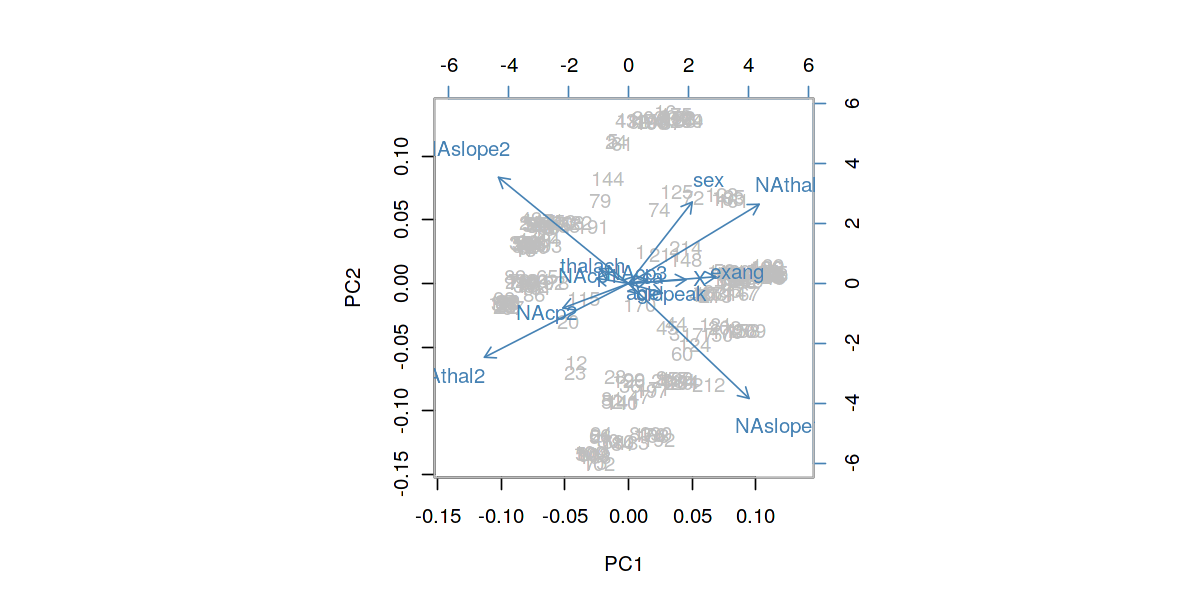

In [13]:
options(repr.plot.width=10, repr.plot.height=5)
biplot(heartTrainNormPCA, col = c("grey", "steelblue"))

It presents a more even distribution of the loading vectors (because of the scaling)

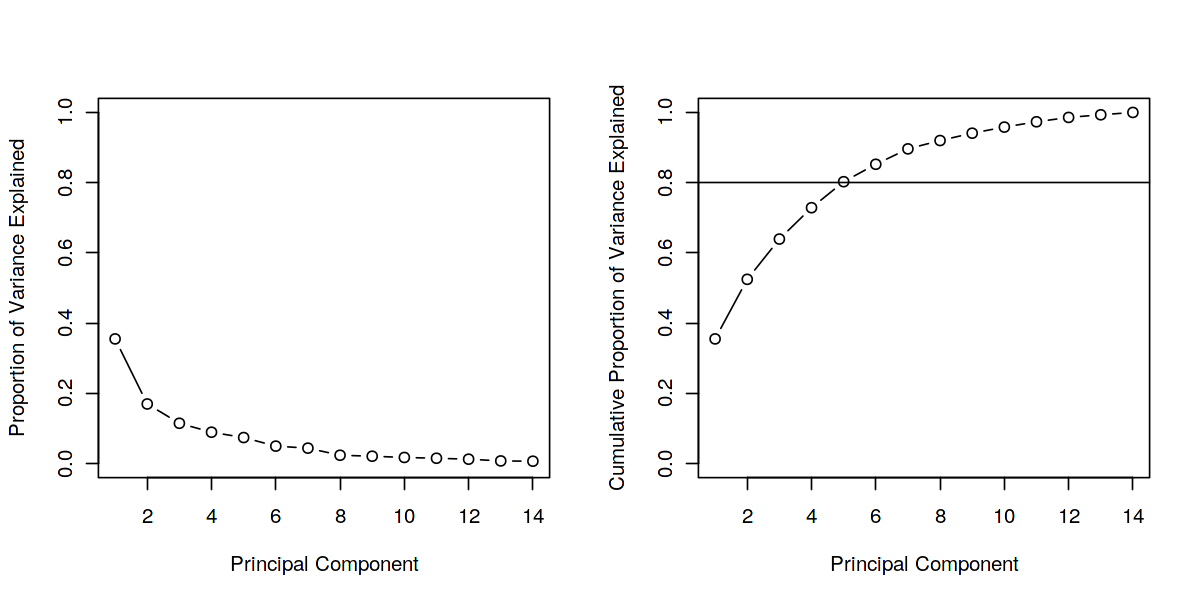

In [14]:
#Getting proportion of variance
heartTrainNormPCAvar <-heartTrainNormPCA$sdev^2
pve <- heartTrainNormPCAvar/sum(heartTrainNormPCAvar) #Proportion of variance of principal components

par(mfrow=c(1,2))
#Plot variance explained for each principal component
plot(pve, xlab = "Principal Component", ylab ="Proportion of Variance Explained", ylim = c(0,1), type ="b")
# Plot cumulative proportion of variance explained
plot(cumsum(pve), xlab = "Principal Component",
     ylab = "Cumulative Proportion of Variance Explained",
     ylim = c(0, 1), type = "b")
abline(h=0.8)

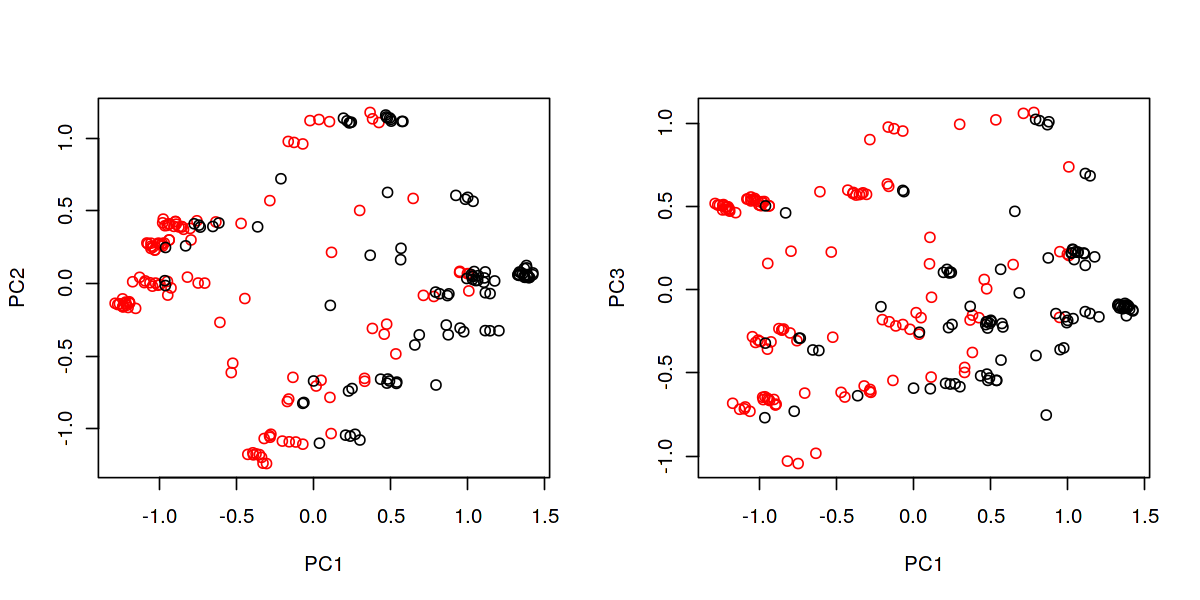

In [15]:
# Scatter plot observations by components 1 and 2
target <- as.numeric(heartTrainNorm$target == 1)
par(mfrow=c(1,2))
plot(heartTrainNormPCA$x[, c(1, 2)], col = (target + 1), 
     xlab = "PC1", ylab = "PC2")

# Repeat for components 1 and 3
plot(heartTrainNormPCA$x[, c(1, 3)], col = (target + 1), 
     xlab = "PC1", ylab = "PC3")

**Conclusion:** Select the first four components

##### SECOND ATTEMP WITH ORIGINAL VARIABLES

In [16]:
#Split data
indOriginal <- sample(2,nrow(heartForLatterUse),replace=TRUE,prob=c(0.7,0.3))
heartOriginal_train <- heartForLatterUse[indOriginal==1,]
heartOriginal_test <- heartForLatterUse[indOriginal==2,]
#PCA with original features
heartOriginalPCA <-prcomp(x = subset(heartOriginal_train,select = -target), scale = FALSE, center = TRUE)
summary(heartOriginalPCA)

Importance of components:
                          PC1     PC2      PC3     PC4     PC5    PC6     PC7
Standard deviation     49.894 22.8240 17.48554 7.55918 1.24695 1.0130 0.86279
Proportion of Variance  0.737  0.1542  0.09052 0.01692 0.00046 0.0003 0.00022
Cumulative Proportion   0.737  0.8912  0.98173 0.99865 0.99911 0.9994 0.99963
                          PC8     PC9    PC10    PC11    PC12    PC13
Standard deviation     0.5848 0.51892 0.45353 0.40966 0.38793 0.32394
Proportion of Variance 0.0001 0.00008 0.00006 0.00005 0.00004 0.00003
Cumulative Proportion  0.9997 0.99981 0.99987 0.99992 0.99997 1.00000

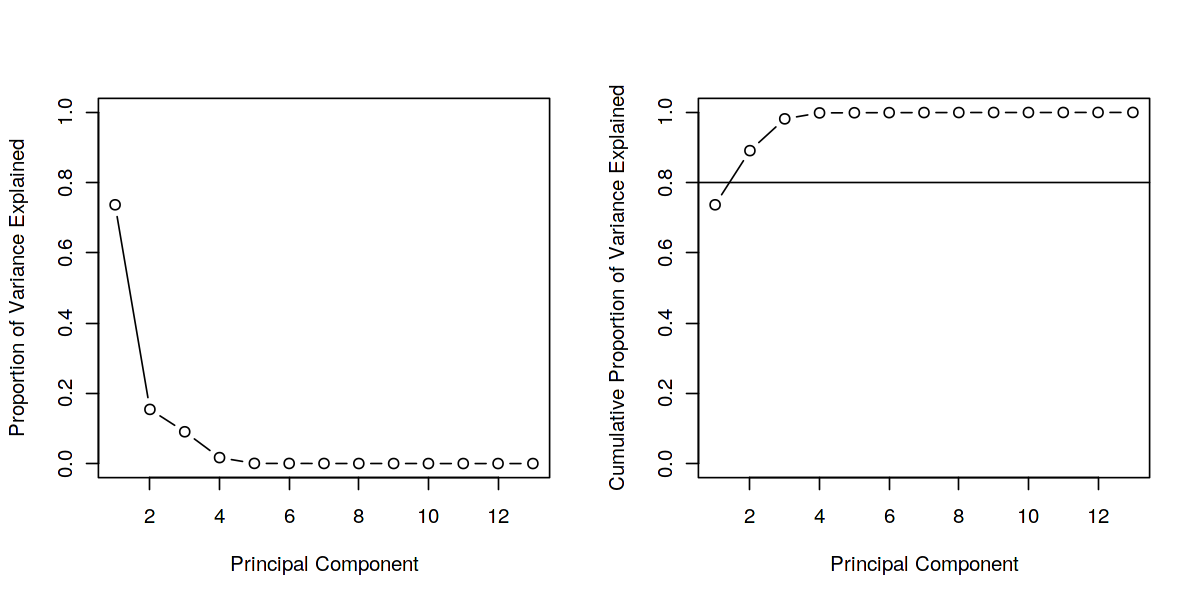

In [17]:
#Getting proportion of variance
heartOriginalPCAvar <-heartOriginalPCA$sdev^2
pve <- heartOriginalPCAvar/sum(heartOriginalPCAvar) #Proportion of variance of principal components

par(mfrow=c(1,2))
#Plot variance explained for each principal component
plot(pve, xlab = "Principal Component", ylab ="Proportion of Variance Explained", ylim = c(0,1), type ="b")
# Plot cumulative proportion of variance explained
plot(cumsum(pve), xlab = "Principal Component",
     ylab = "Cumulative Proportion of Variance Explained",
     ylim = c(0, 1), type = "b")
abline(h=0.8)

**Conclusion:** Select the first component

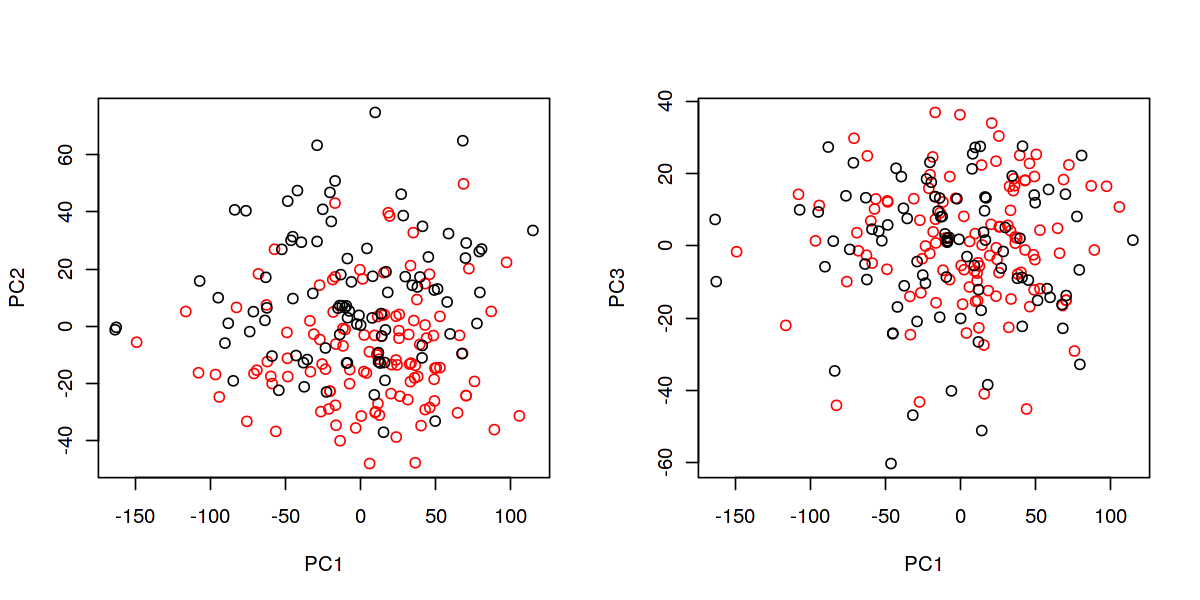

In [18]:
# Scatter plot observations by components 1 and 2
target <- as.numeric(heartOriginal_train$target == 1)
par(mfrow=c(1,2))
plot(heartOriginalPCA$x[, c(1, 2)], col = (target + 1), 
     xlab = "PC1", ylab = "PC2")

# Scatter plot observations by components 1 and 3
plot(heartOriginalPCA$x[, c(1, 3)], col = (target + 1), 
     xlab = "PC1", ylab = "PC3")

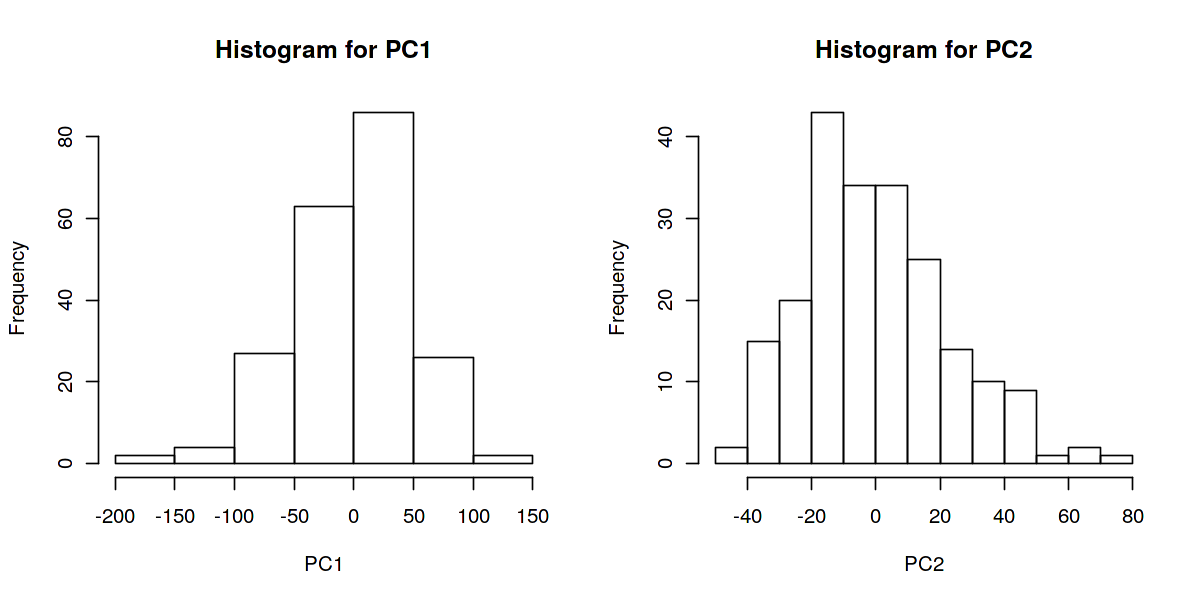

In [19]:
par(mfrow=c(1,2))
hist(heartOriginalPCA$x[, 1], main="Histogram for PC1",xlab="PC1")
hist(heartOriginalPCA$x[, 2], main="Histogram for PC2",xlab="PC2")

##### COMPARISON BETWEEN BOTH PCA ATTEMPTS

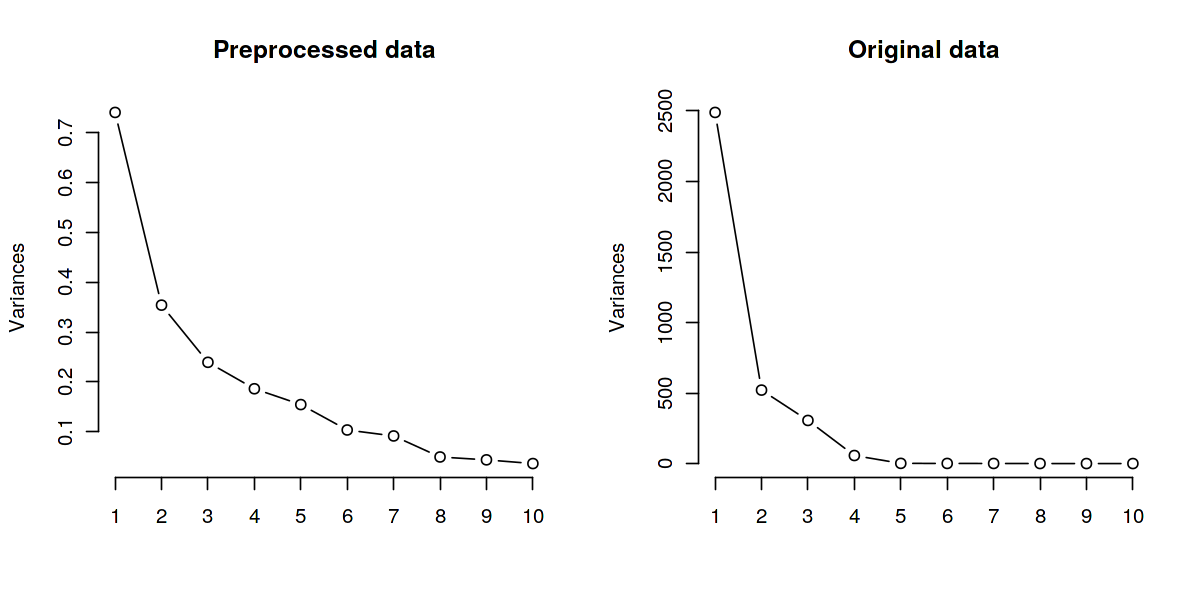

In [20]:
par(mfrow=c(1,2))
screeplot(heartTrainNormPCA, type ="lines", main="Preprocessed data")
screeplot(heartOriginalPCA, type ="lines", main="Original data")
options(repr_option_defaults)

**Conclusion:** It seems as is better to keep the original variables and select the first principal component. **BUT WHY?**

For extracting the values of PCA and use them in the models:
https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/

#### Linear Discriminant Analysis (LDA)

##### ATTEMP1 USE THE OUTPUT FROM PCA WITH THE FIRST FOUR COMPONENTS (ATTEMP1 WITH PREPROCESSED DATA)

In [21]:
heartPCAtarget <-as.data.frame(heartTrainNormPCA$x[,c(1:4)])
heartPCAtarget$target <-heartTrainNorm$target

In [22]:
linear <- lda(target~.,data=heartPCAtarget)
linear
p <- predict(linear,heartPCAtarget)

Call:
lda(target ~ ., data = heartPCAtarget)

Prior probabilities of groups:
        0         1 
0.4490741 0.5509259 

Group means:
         PC1         PC2         PC3         PC4
0  0.6453051  0.06399766 -0.07626500  0.08041583
1 -0.5260050 -0.05216616  0.06216559 -0.06554904

Coefficients of linear discriminants:
           LD1
PC1 -1.5732793
PC2 -0.3264091
PC3  0.5753811
PC4 -0.7795383

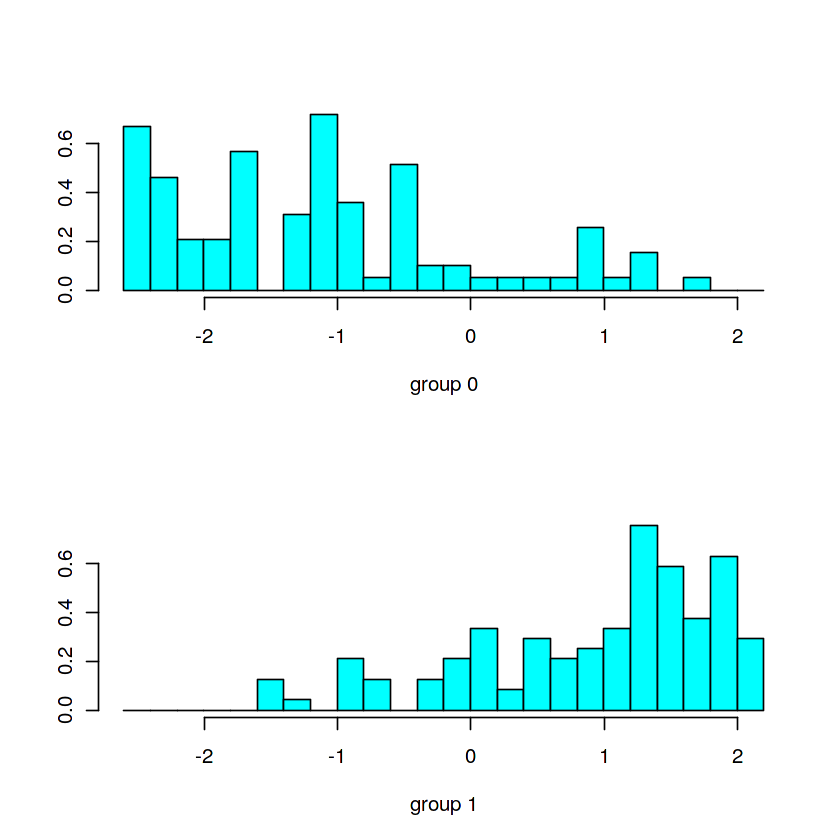

In [23]:
par(mfrow=c(1,2))
ldahist(data = p$x[, 1], g= heartPCAtarget$target)
options(repr_option_defaults)

In [24]:
#Confusion Matrix testing testing data
p1<- predict(linear, heartPCAtarget)$class
tab <- table(Predicted=p1, Actual=heartPCAtarget$target)
tab
(AccuracyTrainLDA1 <- sum(diag(tab))/sum(tab))


#transform test into PCA
heartPCAtargetTest <- predict(heartTrainNormPCA, newdata = heartTestNorm)
heartPCAtargetTest <- as.data.frame(heartPCAtargetTest)[,c(1:4)]
p2<- predict(linear,heartPCAtargetTest)$class
#Confusion Matrix testing training data
tab2 <- table(Predicted=p2, Actual=heartTestNorm$target)
tab2
(AccuracyTestLDA1 <- sum(diag(tab2))/sum(tab2))

#Re-construct heartPCAtargetTest
heartPCAtargetTest$target <-heartTestNorm$target

         Actual
Predicted   0   1
        0  81  14
        1  16 105

[1] 0.8611111

         Actual
Predicted  0  1
        0 31  6
        1  9 39

[1] 0.8235294

##### ATTEMP2 USE THE OUTPUT FROM PCA WITH THE FIRST TWO COMPONENTS (ATTEMP2 WITH ORIGINAL DATA)

In [25]:
heartOriginalPCAtarget <-as.data.frame(heartOriginalPCA$x[,c(1:2)])
heartOriginalPCAtarget$target <-heartOriginal_train$target

In [26]:
linear <- lda(target~.,heartOriginalPCAtarget)
linear
p <- predict(linear,heartOriginalPCAtarget)

Call:
lda(target ~ ., data = heartOriginalPCAtarget)

Prior probabilities of groups:
        0         1 
0.4428571 0.5571429 

Group means:
        PC1      PC2
0 -6.766638 10.98980
1  5.378609 -8.73548

Coefficients of linear discriminants:
             LD1
PC1  0.006060127
PC2 -0.047033407

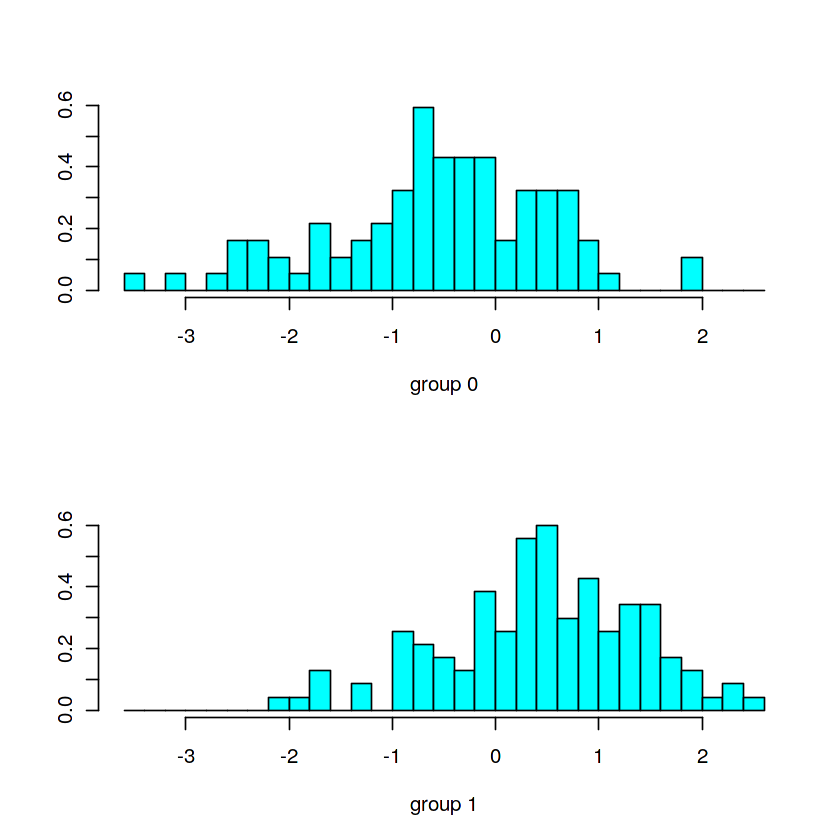

In [27]:
ldahist(data = p$x[, 1], g= heartOriginalPCAtarget$target)

In [28]:
#Confusion Matrix testing training data
p1<- predict(linear, heartOriginalPCAtarget)$class
tab <- table(Predicted=p1, Actual=heartOriginalPCAtarget$target)
tab
(AccuracyTrainLDA2 <- sum(diag(tab))/sum(tab))

#transform test into PCA
heartOriginalPCAtargetTest <- predict(heartOriginalPCA, newdata = heartOriginal_test)
heartOriginalPCAtargetTest <- as.data.frame(heartOriginalPCAtargetTest)[,c(1:2)]
p2<- predict(linear,heartOriginalPCAtargetTest)$class
#Confusion Matrix testing training data
tab2 <- table(Predicted=p2, Actual=heartOriginal_test$target)
tab2
(AccuracyTestLDA2 <- sum(diag(tab2))/sum(tab2))

#Re-construct heartOriginalPCAtargetTest
heartOriginalPCAtargetTest$target<-heartOriginal_test$target

         Actual
Predicted  0  1
        0 57 24
        1 36 93

[1] 0.7142857

         Actual
Predicted  0  1
        0 24  9
        1 20 38

[1] 0.6813187

##### ATTEMP3 USE THE ORIGINAL DATA

In [29]:
linear <- lda(target~.,heartOriginal_train)
linear
p <- predict(linear,heartOriginal_train)

Call:
lda(target ~ ., data = heartOriginal_train)

Prior probabilities of groups:
        0         1 
0.4428571 0.5571429 

Group means:
       age       sex        cp trestbps     chol       fbs   restecg  thalach
0 57.44086 0.7849462 0.4193548 135.1398 252.0860 0.1612903 0.4408602 138.8602
1 52.35043 0.5726496 1.3162393 128.1368 240.2735 0.1196581 0.5982906 156.9316
      exang   oldpeak    slope        ca     thal
0 0.5806452 1.7021505 1.172043 1.2150538 2.602151
1 0.1709402 0.5769231 1.581197 0.2905983 2.153846

Coefficients of linear discriminants:
                  LD1
age      -0.014181691
sex      -0.581208002
cp        0.424104985
trestbps -0.007906961
chol     -0.002697311
fbs      -0.109914961
restecg   0.289206876
thalach   0.008453359
exang    -0.640054052
oldpeak  -0.267266320
slope     0.184479977
ca       -0.394976685
thal     -0.548718154

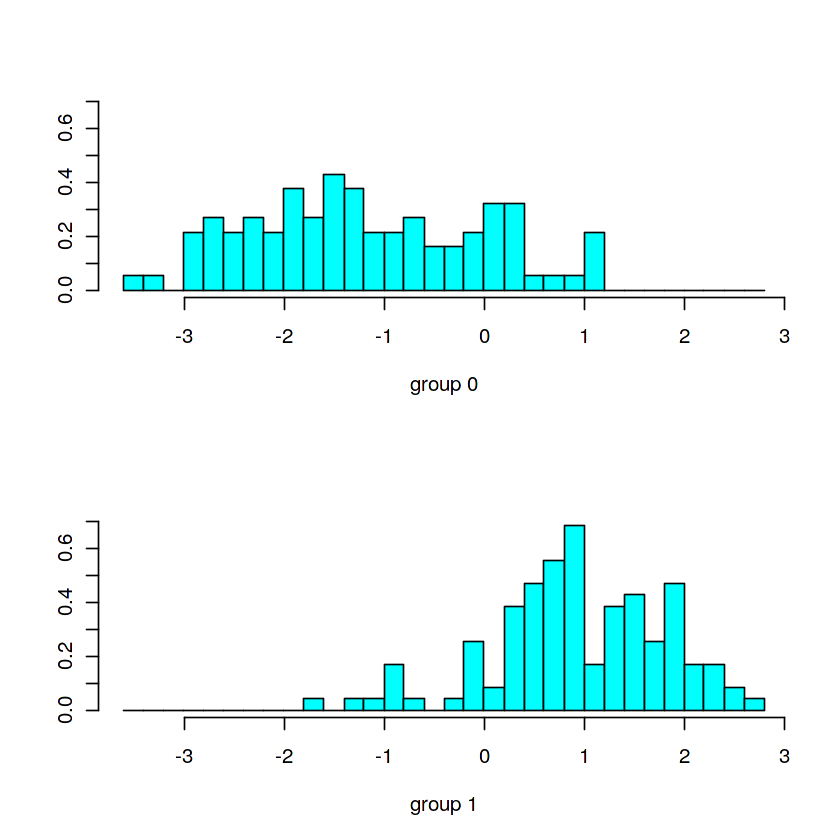

In [30]:
ldahist(data = p$x[, 1], g= heartOriginal_train$target)

In [31]:
#Confusion Matrix testing data
p1<- predict(linear, heartOriginal_train)$class
tab <- table(Predicted=p1, Actual=heartOriginal_train$target)
tab
(AccuracyTrainLDA3 <- sum(diag(tab))/sum(tab))

#Confusion Matrix testing training data
p2<- predict(linear,heartOriginal_test)$class
tab2 <- table(Predicted=p2, Actual=heartOriginal_test$target)
tab2
(AccuracyTestLDA3 <- sum(diag(tab2))/sum(tab2))

         Actual
Predicted   0   1
        0  70   9
        1  23 108

[1] 0.847619

         Actual
Predicted  0  1
        0 30  0
        1 14 47

[1] 0.8461538

29 miss classifications in the model with training data and 15 with testing data, Accuracy of the model: 86.57% with training data and 80% with testing data

Conclusion: LDA do not help us to have a clear separation between the two groups as it can be seen in the past histogram, both variables were not maximally separated. LDA only makes sense in a multiclass setting.

##### COMPARISON BETWEEN THE THREE ATTEMPTS FOR LDA

In [32]:
Result_Attempt1<-c(AccuracyTrainLDA1,AccuracyTestLDA1)
Result_Attempt2<-c(AccuracyTrainLDA2,AccuracyTestLDA2)
Result_Attempt3<-c(AccuracyTrainLDA3,AccuracyTestLDA3)

comparison<-data.frame(Result_Attempt1,Result_Attempt2,Result_Attempt3)
row.names(comparison)<-c("Test","Train")
comparison

,Result_Attempt1,Result_Attempt2,Result_Attempt3
,<dbl>,<dbl>,<dbl>
Test,0.8611111,0.7142857,0.8476190
Train,0.8235294,0.6813187,0.8461538


**Conclusion:** Attempt3 has the highest accurate follow by Attempt1 and lastly Attempt2

### Modeling <a class="anchor" id="mo"></a>

**DATAFRAMES TO USE IN THE MODELS**<br>
_Attempt1_ <br>
heartPCAtarget (train)<br>
heartPCAtargetTest (test)<br>

_Attempt2_ <br>
heartOriginalPCAtarget (train)<br>
heartOriginalPCAtargetTest (test)<br>

_Attempt3_ <br>
heartOriginal_train (train)<br>
heartOriginal_test (test)

For extracting the values of PCA and use them in the models:
https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/

In [33]:
#Convert target to factor in all Atempts
############ Attempt1 ############
heartPCAtarget$target <- as.factor(heartPCAtarget$target)
heartPCAtargetTest$target <- as.factor(heartPCAtargetTest$target)
############ Attempt2 ############
heartOriginalPCAtarget$target<- as.factor(heartOriginalPCAtarget$target)
heartOriginalPCAtargetTest$target <- as.factor(heartOriginalPCAtargetTest$target)
############ Attempt 3 ############
heartOriginal_train$target <- as.factor(heartOriginal_train$target)
heartOriginal_test$target <- as.factor(heartOriginal_test$target)

#### k-Nearest Neighbors (KNN)

In [34]:
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
set.seed(3333)
############ Attempt1 ############
#Model
knn_heart_pred1 <- train(target ~., data = heartPCAtarget, method = "knn",
                         trControl=trctrl,
                         tuneLength = 10)

#Train
knn_predTrain1 <- predict(knn_heart_pred1,newdata = heartPCAtarget)
knn_cfTrain1 <- confusionMatrix(knn_predTrain1, heartPCAtarget$target,positive ="1" )

#Test
knn_predTest1 <- predict(knn_heart_pred1,newdata = heartPCAtargetTest)
knn_cfTest1 <- confusionMatrix(knn_predTest1, heartPCAtargetTest$target,positive ="1" )

# Compute the accuracy
knn_acc1Train <- mean(knn_predTrain1 == heartPCAtarget$target) #Attempt1 Train
knn_acc1Test <- mean(knn_predTest1 == heartPCAtargetTest$target) #Attempt1 Test

In [35]:
############ Attempt2 ############
#Model
knn_heart_pred2 <- train(target ~., data = heartOriginalPCAtarget, method = "knn",
                         trControl=trctrl,
                         tuneLength = 10)

#Train
knn_predTrain2 <- predict(knn_heart_pred2,newdata = heartOriginalPCAtarget)
knn_cfTrain2 <- confusionMatrix(knn_predTrain2, heartOriginalPCAtarget$target,positive ="1" )

#Test
knn_predTest2 <- predict(knn_heart_pred2,newdata = heartOriginalPCAtargetTest)
knn_cfTest2 <- confusionMatrix(knn_predTest2, heartOriginalPCAtargetTest$target,positive ="1" )

# Compute the accuracy
knn_acc2Train <- mean(knn_predTrain2 == heartOriginalPCAtarget$target) #Attempt2 Train
knn_acc2Test <- mean(knn_predTest2 == heartOriginalPCAtargetTest$target) #Attempt2 Test

In [36]:
############ Attempt3 ############
#Model
knn_heart_pred3 <- train(target ~., data = heartOriginal_train, method = "knn",
                         trControl=trctrl,
                         tuneLength = 10)

#Train
knn_predTrain3 <- predict(knn_heart_pred3,newdata = heartOriginal_train)
knn_cfTrain3 <- confusionMatrix(knn_predTrain3, heartOriginal_train$target,positive ="1" )

#Test
knn_predTest3 <- predict(knn_heart_pred3,newdata = heartOriginal_test)
knn_cfTest3 <- confusionMatrix(knn_predTest3, heartOriginal_test$target,positive ="1" )

# Compute the accuracy
knn_acc3Train <- mean(knn_predTrain3 == heartOriginal_train$target) #Attempt3 Train
knn_acc3Test <- mean(knn_predTest3 == heartOriginal_test$target) #Attempt3 Test

In [37]:
print ("-----------NAIVE BAYES ACCURACIES-----------",quote=FALSE)
print(paste("Accuracy train Attempt1: ",knn_acc1Train),quote=FALSE)
print(paste("Accuracy test Attempt1: ",knn_acc1Test),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt2: ",knn_acc2Train),quote=FALSE)
print(paste("Accuracy test Attempt2: ",knn_acc2Test),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt3: ",knn_acc3Train),quote=FALSE)
print(paste("Accuracy test Attempt3: ",knn_acc3Test),quote=FALSE)

[1] -----------NAIVE BAYES ACCURACIES-----------


[1] Accuracy train Attempt1:  0.847222222222222


[1] Accuracy test Attempt1:  0.811764705882353


[1] --------------------------------------------


[1] Accuracy train Attempt2:  0.70952380952381


[1] Accuracy test Attempt2:  0.681318681318681


[1] --------------------------------------------


[1] Accuracy train Attempt3:  0.7


[1] Accuracy test Attempt3:  0.615384615384615


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


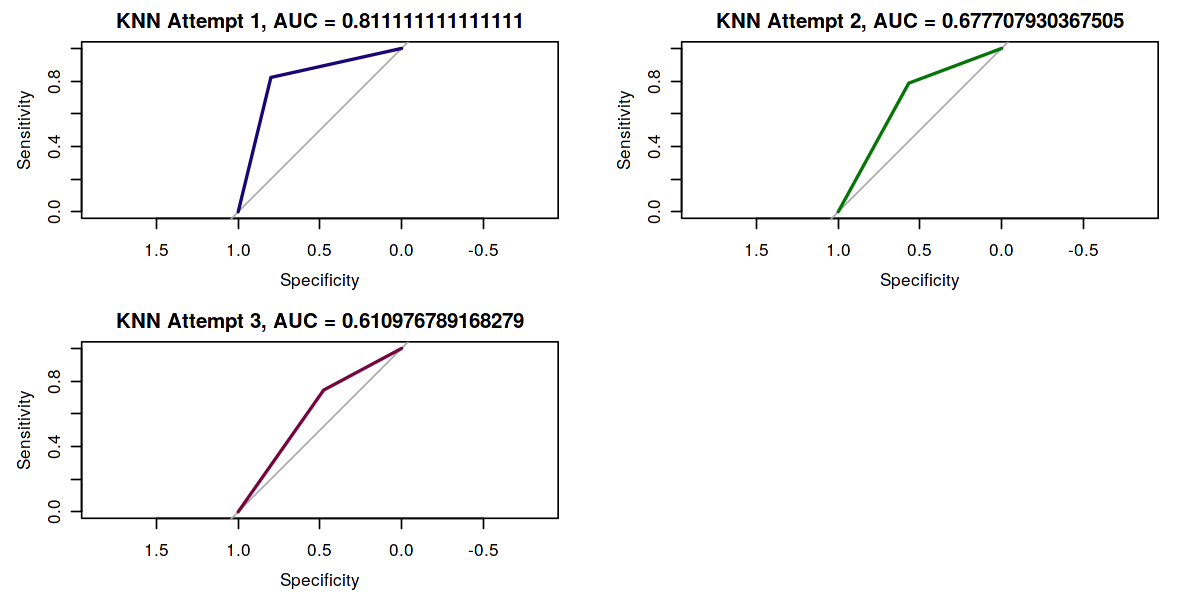

In [38]:
### ROC CURVES FOR Naïve Bayes ###
knn_ROCTest1 <- roc(heartPCAtargetTest$target, as.numeric(knn_predTest1))
knn_ROCTest2 <- roc(heartOriginalPCAtargetTest$target,as.numeric(knn_predTest2))
knn_ROCTest3 <- roc(heartOriginal_test$target, as.numeric(knn_predTest3))

# Plot the ROC curve
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(2,2))
plot(knn_ROCTest1, main = paste("KNN Attempt 1, AUC =",auc(knn_ROCTest1)), col ="#190575")
plot(knn_ROCTest2, main = paste("KNN Attempt 2, AUC =",auc(knn_ROCTest2)), col ="#057507")
plot(knn_ROCTest3, main = paste("KNN Attempt 3, AUC =",auc(knn_ROCTest3)), col ="#75053f")

In [39]:
## Performance metrics ##
############ Attempt1 ############
knn_accTest1 <- round(knn_acc1Test, digits = 3)
knn_senTest1 <- round(sensitivity(knn_predTest1,heartPCAtargetTest$target), digits = 3)
knn_speTest1 <- round(specificity(knn_predTest1,heartPCAtargetTest$target), digits = 3)
knn_aucTest1 <- round(auc(knn_ROCTest1), digits = 3)
############ Attempt2 ############
knn_accTest2 <- round(knn_acc2Test, digits = 3)
knn_senTest2 <- round(sensitivity(knn_predTest2,heartOriginalPCAtargetTest$target), digits = 3)
knn_speTest2 <- round(specificity(knn_predTest2,heartOriginalPCAtargetTest$target), digits = 3)
knn_aucTest2 <- round(auc(knn_ROCTest2), digits = 3)
############ Attempt3 ############
knn_accTest3 <- round(knn_acc3Test, digits = 3)
knn_senTest3 <- round(sensitivity(knn_predTest3,heartOriginal_test$target), digits = 3)
knn_speTest3 <- round(specificity(knn_predTest3,heartOriginal_test$target), digits = 3)
knn_aucTest3 <- round(auc(knn_ROCTest3), digits = 3)

#### Naïve Bayes

In [40]:
############ Attempt1 ############
## Convert the target in factor

##Model
nb_heart_pred1 <- naiveBayes(target~., data=heartPCAtarget)

##Prediction
#Train
nb_predTrain1 <- predict(nb_heart_pred1,heartPCAtarget, type="class")
nb_cfTrain1 <-confusionMatrix(nb_predTrain1,heartPCAtarget$target, positive ="1")

#Test
nb_predTest1 <- predict(nb_heart_pred1,heartPCAtargetTest, type="class")
nb_cfTest1 <-confusionMatrix(nb_predTest1,heartPCAtargetTest$target, positive ="1")

# Compute the accuracy
nb_acc1Train <-mean(nb_predTrain1 == heartPCAtarget$target) #Attempt1 Train
nb_acc1Test <-mean(nb_predTest1 == heartPCAtargetTest$target) #Attempt1 Test

In [41]:
############ Attempt2 ############
## Convert the target in factor

##Model
nb_heart_pred2 <- naiveBayes(target~., data=heartOriginalPCAtarget)

##Prediction
#Train
nb_predTrain2 <- predict(nb_heart_pred2,heartOriginalPCAtarget, type="class")
nb_cfTrain2 <-confusionMatrix(nb_predTrain2,heartOriginalPCAtarget$target, positive ="1")

#Test
nb_predTest2 <- predict(nb_heart_pred2,heartOriginalPCAtargetTest, type="class")
nb_cfTest2 <-confusionMatrix(nb_predTest2,heartOriginalPCAtargetTest$target, positive ="1")

# Compute the accuracy
nb_acc2Train <-mean(nb_predTrain2 == heartOriginalPCAtarget$target) #Attempt2 Train
nb_acc2Test <-mean(nb_predTest2 == heartOriginalPCAtargetTest$target) #Attempt2 Test

In [42]:
############ Attempt3 ############
## Convert the target in factor

##Model
nb_heart_pred3 <- naiveBayes(target~., data=heartOriginal_train)

##Prediction
#Train
nb_predTrain3 <- predict(nb_heart_pred3,heartOriginal_train, type="class")
nb_cfTrain3 <-confusionMatrix(nb_predTrain3,heartOriginal_train$target, positive ="1")

#Test
nb_predTest3 <- predict(nb_heart_pred3,heartOriginal_test, type="class")
nb_cfTest3 <-confusionMatrix(nb_predTest3,heartOriginal_test$target, positive ="1")


# Compute the accuracy
nb_acc3Train <-mean(nb_predTrain3 == heartOriginal_train$target) #Attempt3 Train
nb_acc3Test <-mean(nb_predTest3 == heartOriginal_test$target) #Attempt3 Test

In [43]:
print ("-----------NAIVE BAYES ACCURACIES-----------",quote=FALSE)
print(paste("Accuracy train Attempt1: ",nb_acc1Train),quote=FALSE)
print(paste("Accuracy test Attempt1: ",nb_acc1Test),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt2: ",nb_acc2Train),quote=FALSE)
print(paste("Accuracy test Attempt2: ",nb_acc2Test),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt3: ",nb_acc3Train),quote=FALSE)
print(paste("Accuracy test Attempt3: ",nb_acc3Test),quote=FALSE)

[1] -----------NAIVE BAYES ACCURACIES-----------


[1] Accuracy train Attempt1:  0.828703703703704


[1] Accuracy test Attempt1:  0.8


[1] --------------------------------------------


[1] Accuracy train Attempt2:  0.7


[1] Accuracy test Attempt2:  0.67032967032967


[1] --------------------------------------------


[1] Accuracy train Attempt3:  0.857142857142857


[1] Accuracy test Attempt3:  0.802197802197802


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


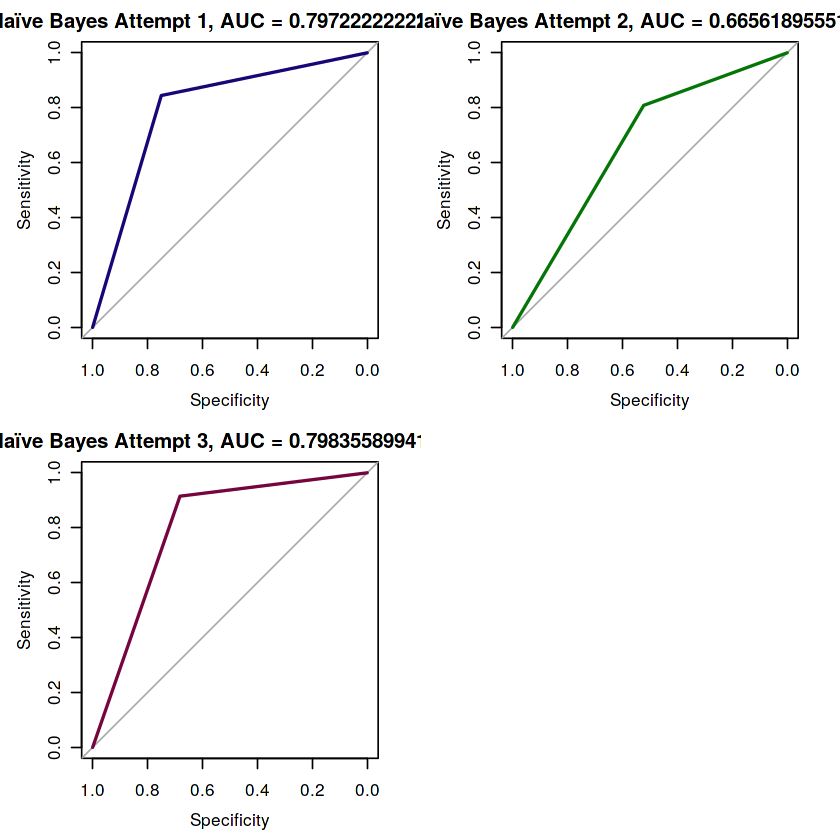

In [44]:
### ROC CURVES FOR Naïve Bayes ###
nb_ROCTest1 <- roc(heartPCAtargetTest$target, as.numeric(nb_predTest1))
nb_ROCTest2 <- roc(heartOriginalPCAtargetTest$target,as.numeric(nb_predTest2))
nb_ROCTest3 <- roc(heartOriginal_test$target, as.numeric(nb_predTest3))

# Plot the ROC curve
par(mfrow=c(2,2))
plot(nb_ROCTest1, main = paste("Naïve Bayes Attempt 1, AUC =",auc(nb_ROCTest1)), col ="#190575")
plot(nb_ROCTest2, main = paste("Naïve Bayes Attempt 2, AUC =",auc(nb_ROCTest2)), col ="#057507")
plot(nb_ROCTest3, main = paste("Naïve Bayes Attempt 3, AUC =",auc(nb_ROCTest3)), col ="#75053f")

options(repr_option_defaults)

In [45]:
## Performance metrics ##
############ Attempt1 ############
nb_accTest1 <- round(nb_acc1Test, digits = 3)
nb_senTest1 <- round(sensitivity(nb_predTest1,heartPCAtargetTest$target), digits = 3)
nb_speTest1 <- round(specificity(nb_predTest1,heartPCAtargetTest$target), digits = 3)
nb_aucTest1 <- round(auc(nb_ROCTest1), digits = 3)
############ Attempt2 ############
nb_accTest2 <- round(nb_acc2Test, digits = 3)
nb_senTest2 <- round(sensitivity(nb_predTest2,heartOriginalPCAtargetTest$target), digits = 3)
nb_speTest2 <- round(specificity(nb_predTest2,heartOriginalPCAtargetTest$target), digits = 3)
nb_aucTest2 <- round(auc(nb_ROCTest2), digits = 3)
############ Attempt3 ############
nb_accTest3 <- round(nb_acc3Test, digits = 3)
nb_senTest3 <- round(sensitivity(nb_predTest3,heartOriginal_test$target), digits = 3)
nb_speTest3 <- round(specificity(nb_predTest3,heartOriginal_test$target), digits = 3)
nb_aucTest3 <- round(auc(nb_ROCTest3), digits = 3)

#### Logistic Regression Model

In [46]:
#Logistic Regression Model Train
############ Attempt1 ############
lrmodelA1 <- glm(target~PC1+PC2+PC3+PC4,data=heartPCAtarget,family="binomial")

#Prediction training
lrprobA1 <- predict(lrmodelA1,heartPCAtarget,type="response")
#mean(lrprobA1)
lrpredA1<- ifelse(lrprobA1 > 0.55,1,0)

#Accuracy
lg_acc1Train <- mean(lrpredA1 == heartPCAtarget$target)
############ Attempt2 ############
lrmodelA2 <- glm(target~PC1+PC2,data=heartOriginalPCAtarget,family="binomial")

#Prediction training
lrprobA2 <- predict(lrmodelA2,heartOriginalPCAtarget,type="response")
#mean(lrprobA2)
lrpredA2<- ifelse(lrprobA2 > 0.55,1,0)

#Accuracy
lg_acc2Train <- mean(lrpredA2== heartOriginalPCAtarget$target)
############ Attempt3 ############
lrmodelA3 <- glm(target~.,data=heartOriginal_train,family="binomial")

#Prediction training
lrprobA3 <- predict(lrmodelA3,heartOriginal_train,type="response")
#mean(lrprobA3)
lrpredA3<- ifelse(lrprobA3 > 0.55,1,0)

#Accuracy
lg_acc3Train <- mean(lrpredA3==heartOriginal_train$target)

In [47]:
# Prediction of Logistic Regression Model with Testing data:
############ Attempt1 ############
lrprobA1Test <- predict(lrmodelA1,heartPCAtargetTest,type="response")
lrpredA1Test<- ifelse(lrprobA1Test > 0.55,1,0)
#Accuracy
lg_accTest1 <- mean(lrpredA1Test==heartPCAtargetTest$target)
############ Attempt2 ############
lrprobA2Test <- predict(lrmodelA2,heartOriginalPCAtargetTest,type="response")
lrpredA2Test<- ifelse(lrprobA2Test > 0.55,1,0)

#Accuract
lg_accTest2 <- mean(lrpredA2Test==heartOriginalPCAtargetTest$target)

############ Attempt3 ############
lrprobA3Test <- predict(lrmodelA3,heartOriginal_test,type="response")
lrpredA3Test<- ifelse(lrprobA3Test > 0.55,1,0)

lg_accTest3 <- mean(lrpredA3Test==heartOriginal_test$target) 

In [48]:
print ("-----------LOGISTIC REGRESSION MODEL ACCURACIES-----------",quote=FALSE)
print(paste("Accuracy train Attempt1: ",lg_acc1Train),quote=FALSE)
print(paste("Accuracy test Attempt1: ",lg_accTest1),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt2: ",lg_acc2Train),quote=FALSE)
print(paste("Accuracy test Attempt2: ",lg_accTest2),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt3: ",lg_acc3Train),quote=FALSE)
print(paste("Accuracy test Attempt3: ",lg_accTest3),quote=FALSE)

[1] -----------LOGISTIC REGRESSION MODEL ACCURACIES-----------


[1] Accuracy train Attempt1:  0.842592592592593


[1] Accuracy test Attempt1:  0.811764705882353


[1] --------------------------------------------


[1] Accuracy train Attempt2:  0.714285714285714


[1] Accuracy test Attempt2:  0.692307692307692


[1] --------------------------------------------


[1] Accuracy train Attempt3:  0.838095238095238


[1] Accuracy test Attempt3:  0.824175824175824


In [49]:
#Confusion Matrix and Statstics of the Model with the training data for the Logistic Regression Model
############ Attempt1 ############
lrpredA1 <- as.factor(lrpredA1)

lrcmA1Train <- confusionMatrix(lrpredA1,heartPCAtarget$target)
lrbyClassA1Train <- lrcmA1Train$byClass
lg_senTrain1 <- round(lrbyClassA1Train['Sensitivity'], digits = 3)
lg_speTrain1	<- round(lrbyClassA1Train['Specificity'], digits = 3)

############ Attempt2 ############
lrpredA2 <- as.factor(lrpredA2)

lrcmA2Train <- confusionMatrix(lrpredA2,heartOriginalPCAtarget$target)
lrbyClassA2Train <- lrcmA2Train$byClass
lg_senTrain2 <- round(lrbyClassA2Train['Sensitivity'],digits = 3)
lg_speTrain2 <- round(lrbyClassA2Train['Specificity'],digits = 3)
	
############ Attempt3 ############
lrpredA3 <- as.factor(lrpredA3)

lrcmA3Train <- confusionMatrix(lrpredA3,heartOriginal_train$target)
lrbyClassA3Train <- lrcmA3Train$byClass
lg_senTrain3 <- round(lrbyClassA3Train['Sensitivity'],digits = 3)
lg_speTrain3	<- round(lrbyClassA3Train['Specificity'],digits = 3)

###### Calculation ROC and AUC curves with the Training data LR Model

Setting levels: control = 0, case = 1


Setting direction: controls < cases


[1] "Area Under the Curve AUC Logistic Regression Model Attempt 1: 0.91250108290739"


Setting levels: control = 0, case = 1


Setting direction: controls < cases


[1] "Area Under the Curve AUC Logistic Regression Model Attempt 2: 0.760408050730631"


Setting levels: control = 0, case = 1


Setting direction: controls < cases


[1] "Area Under the Curve AUC Logistic Regression Model Attempt 3: 0.927855895597831"


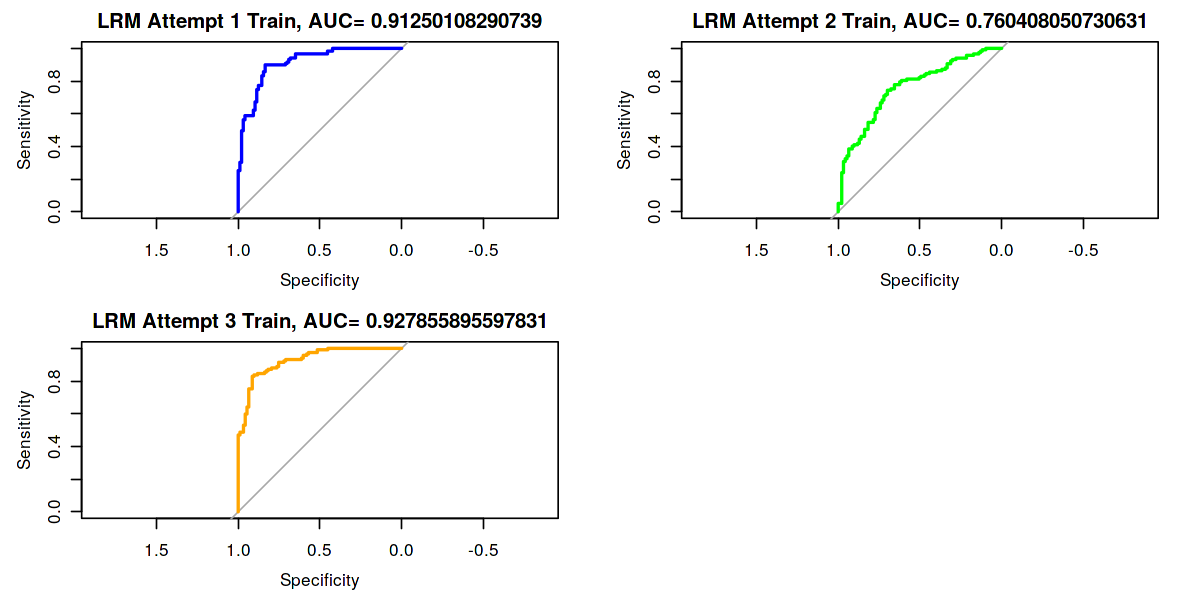

In [50]:
library("pROC")
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(2,2))
############ Attempt1 ############
# Create a ROC curve A1
ROCA1 <- roc(heartPCAtarget$target, lrprobA1)
# Plot the ROC curve

plot(ROCA1, main=paste("LRM Attempt 1 Train, AUC=",auc(ROCA1)),col = "blue")
# Calculate the area under the curve (AUC)

print(paste('Area Under the Curve AUC Logistic Regression Model Attempt 1:',auc(ROCA1) ))
############ Attempt2 ############
# Create a ROC curve A2
ROCA2 <- roc(heartOriginalPCAtarget$target, lrprobA2)
# Plot the ROC curve

plot(ROCA2, main=paste("LRM Attempt 2 Train, AUC=",auc(ROCA2)),col = "green")
# Calculate the area under the curve (AUC)

print(paste('Area Under the Curve AUC Logistic Regression Model Attempt 2:',auc(ROCA2) ))
############ Attempt3 ############
# Create a ROC curve A3
ROCA3 <- roc(heartOriginal_train$target, lrprobA3)
# Plot the ROC curve

plot(ROCA3, main=paste("LRM Attempt 3 Train, AUC=",auc(ROCA3)),col = "orange")
# Calculate the area under the curve (AUC)

print(paste('Area Under the Curve AUC Logistic Regression Model Attempt 3:',auc(ROCA3) ))

In [51]:
#Confusion Matrix and Statstics of the Model with the testing data for the Logistic Regression Model
############ Attempt1 ############
lrpredA1Test <- as.factor(lrpredA1Test)
lg_accTest1 <- round(lg_accTest1, digits = 3)
lrcmA1Test <- confusionMatrix(lrpredA1Test,heartPCAtargetTest$target,positive ="1")

lrbyClassA1Test <- lrcmA1Test$byClass
lg_senTest1 <- round(lrbyClassA1Test['Sensitivity'],digits = 3)
lg_speTest1	<- round(lrbyClassA1Test['Specificity'],digits = 3)
############ Attempt2 ############
lrpredA2Test <- as.factor(lrpredA2Test)
lg_accTest2 <- round(lg_accTest2, digits = 3)
lrcmA2Test <- confusionMatrix(lrpredA2Test,heartOriginalPCAtargetTest$target,positive ="1")
lrbyClassA2Test <- lrcmA2Test$byClass
lg_senTest2 <- round(lrbyClassA2Test['Sensitivity'],digits = 3)
lg_speTest2	<- round(lrbyClassA2Test['Specificity'],digits = 3)
############ Attempt3 ############
lrpredA3Test <- as.factor(lrpredA3Test)
lg_accTest3 <- round(lg_accTest3, digits = 3)
lrcmA3Test <- confusionMatrix(lrpredA3Test,heartOriginal_test$target,positive ="1")
lrbyClassA3Test <- lrcmA3Test$byClass
lg_senTest3 <- round(lrbyClassA3Test['Sensitivity'],digits = 3)
lg_speTest3	<- round(lrbyClassA3Test['Specificity'],digits = 3)

###### Calculation ROC and AUC curves with the Training data LR Model

Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


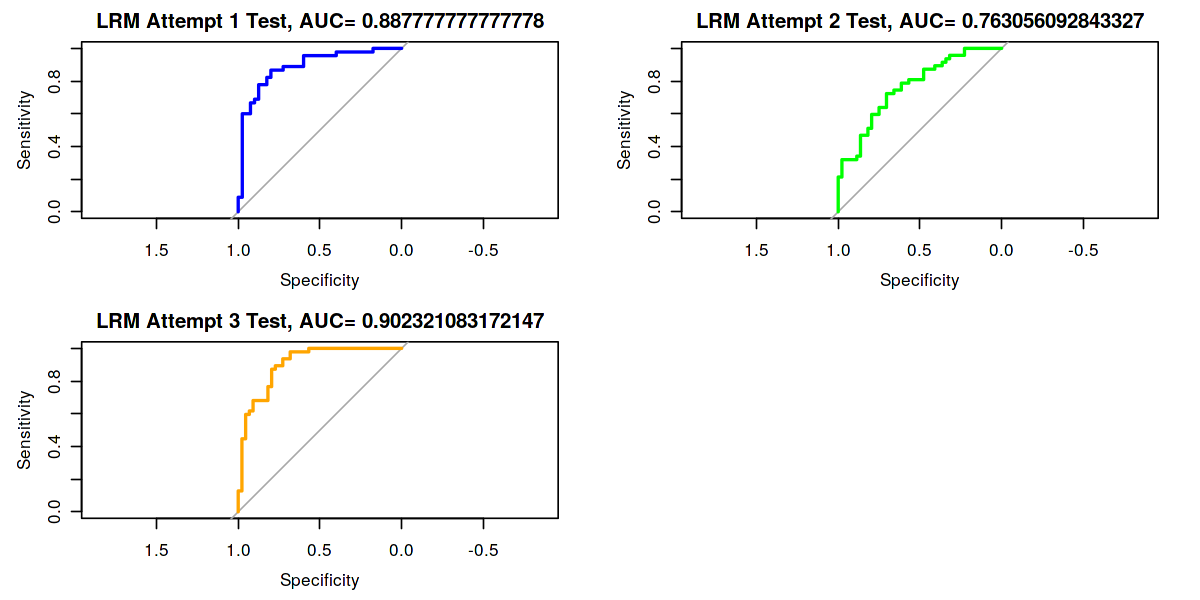

In [52]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(2,2))
############ Attempt1 ############
# Create a ROC curve A1 test
ROCA1Test <- roc(heartPCAtargetTest$target, lrprobA1Test)
# Plot the ROC curve

plot(ROCA1Test, main=paste("LRM Attempt 1 Test, AUC=",auc(ROCA1Test)),col = "blue")
# Calculate the area under the curve Test (AUC)
lg_aucTest1 <- round(auc(ROCA1Test),digits = 3)

############ Attempt2 ############
# Create a ROC curve A2
ROCA2Test <- roc(heartOriginalPCAtargetTest$target, lrprobA2Test)
# Plot the ROC curve

plot(ROCA2Test, main=paste("LRM Attempt 2 Test, AUC=",auc(ROCA2Test)),col = "green")
# Calculate the area under the curve Test(AUC)
lg_aucTest2 <- round(auc(ROCA2Test),digits = 3)

############ Attempt3 ############
# Create a ROC curve A3
ROCA3Test <- roc(heartOriginal_test$target, lrprobA3Test)
# Plot the ROC curve

plot(ROCA3Test, main=paste("LRM Attempt 3 Test, AUC=",auc(ROCA3Test)),col = "orange")
# Calculate the area under the curve Test(AUC)
lg_aucTest3 <- round(auc(ROCA3Test),digits = 3)


#### Decission trees

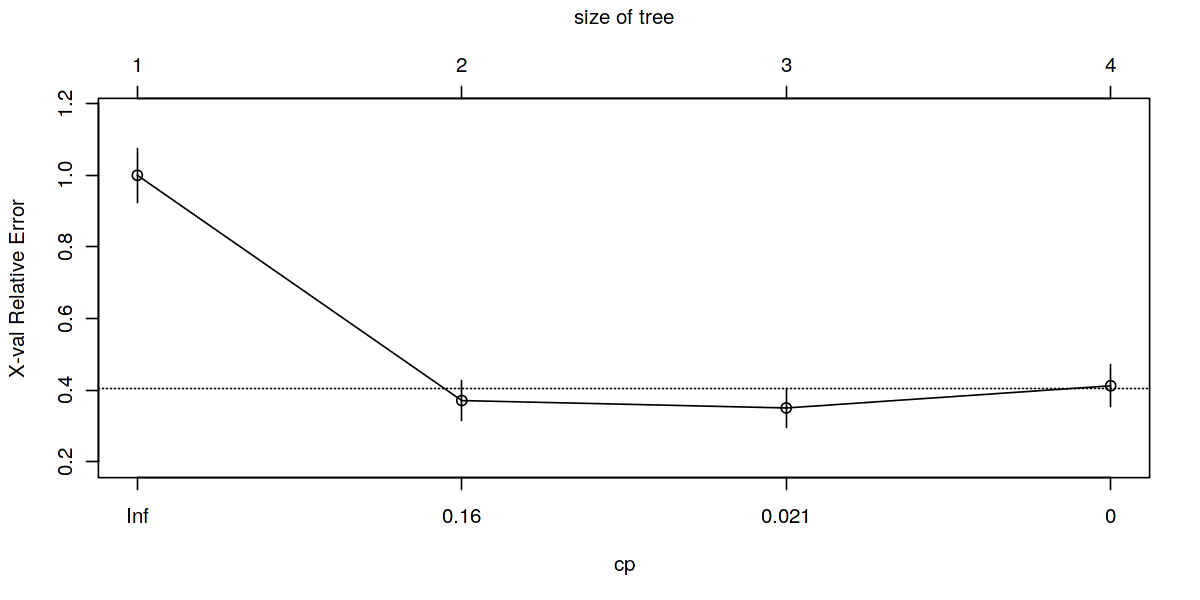

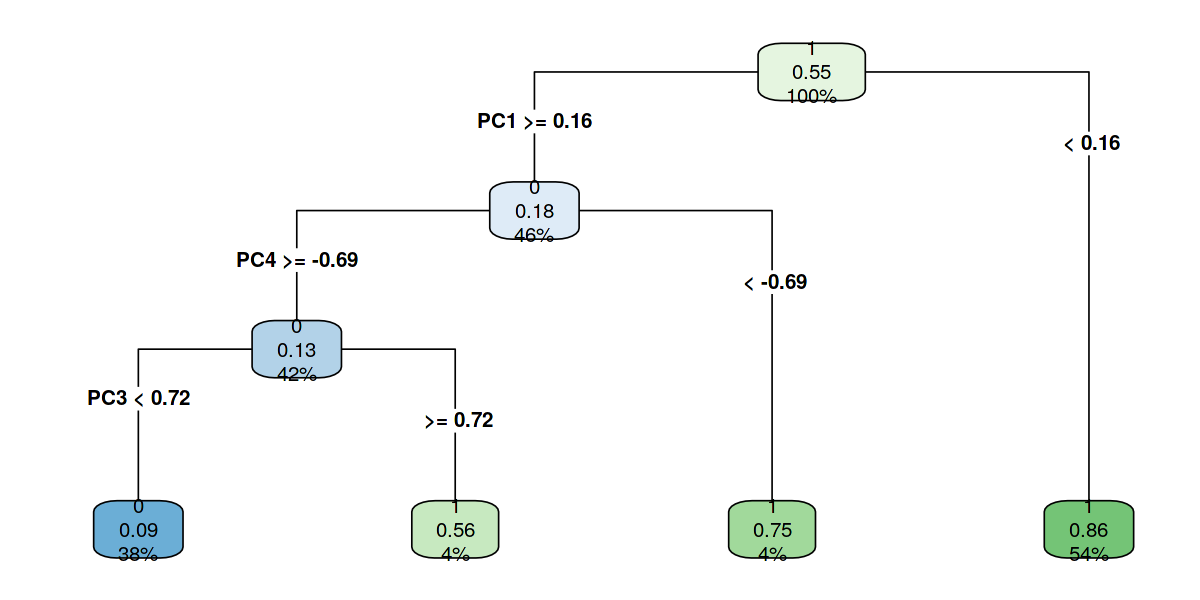

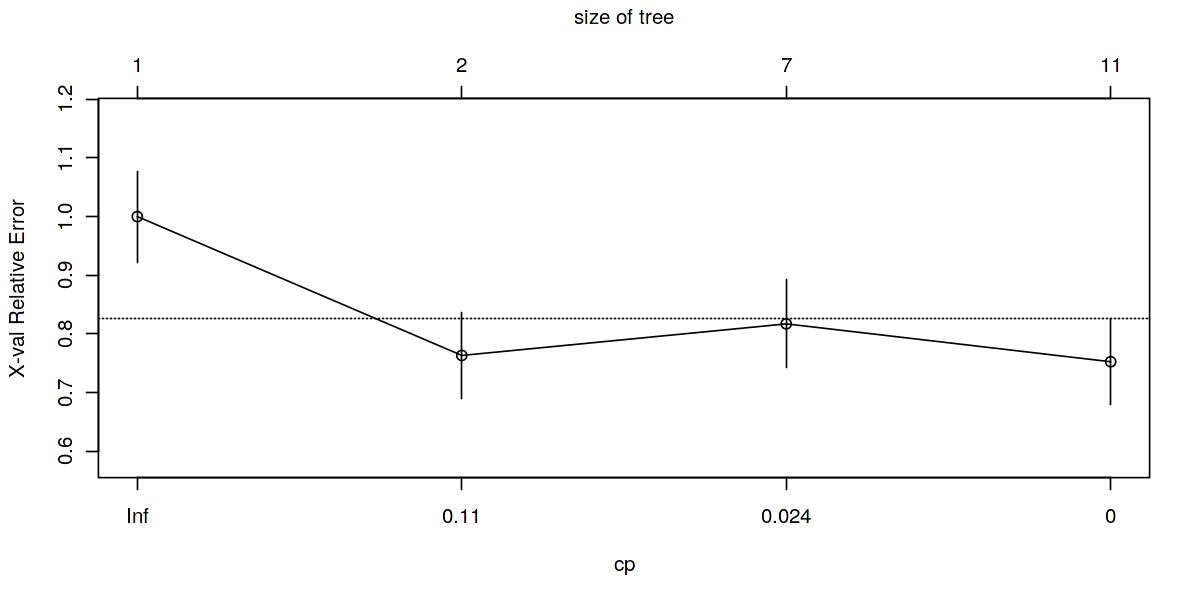

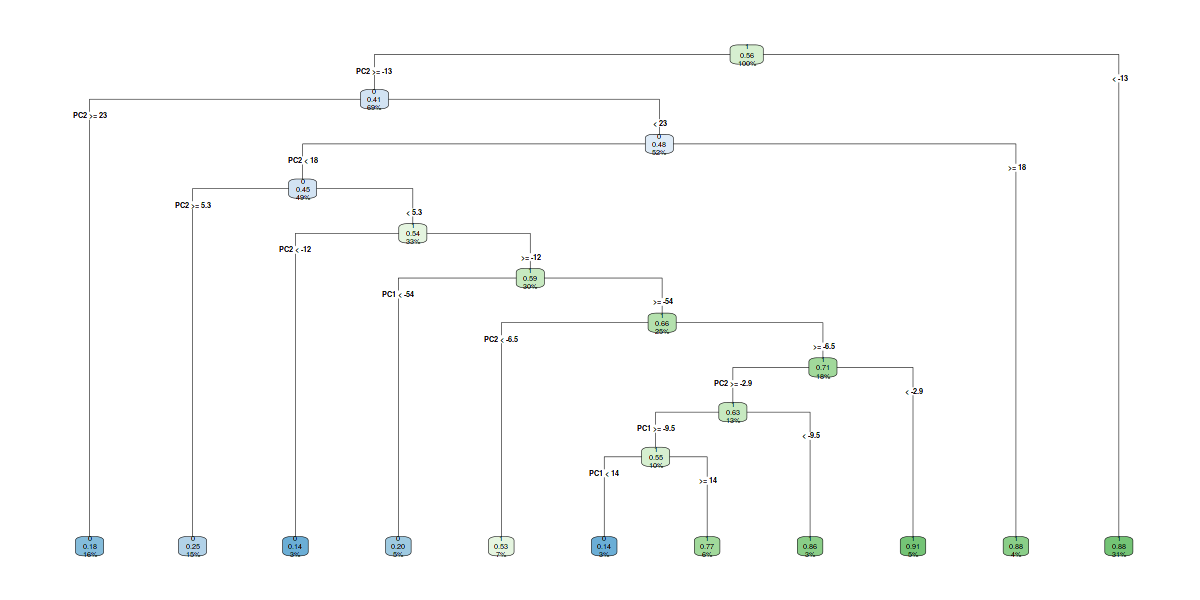

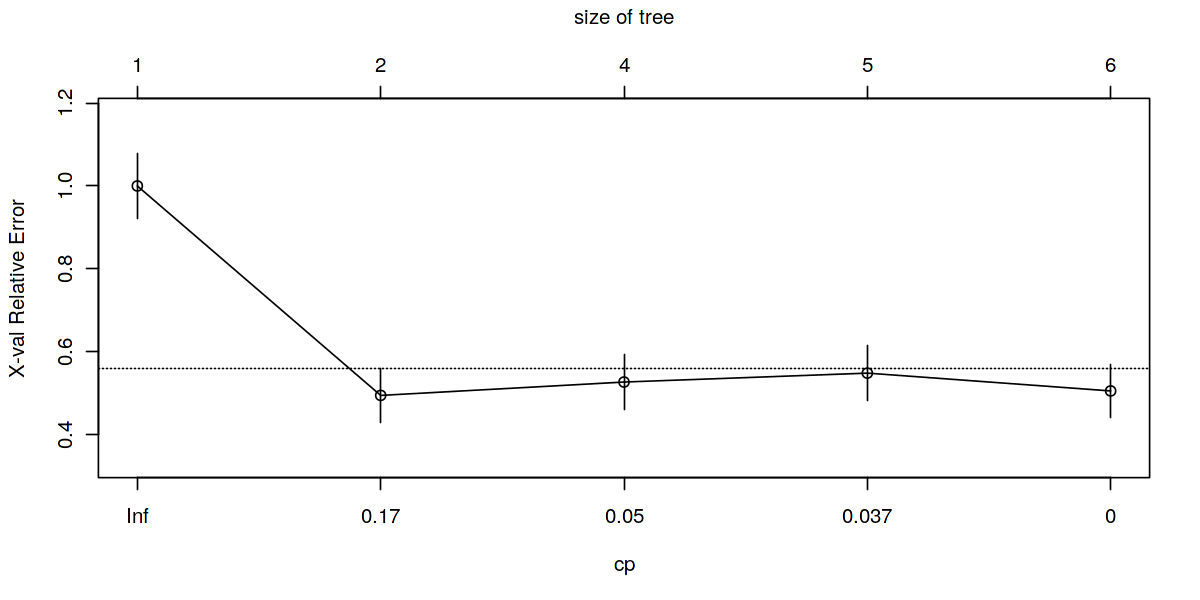

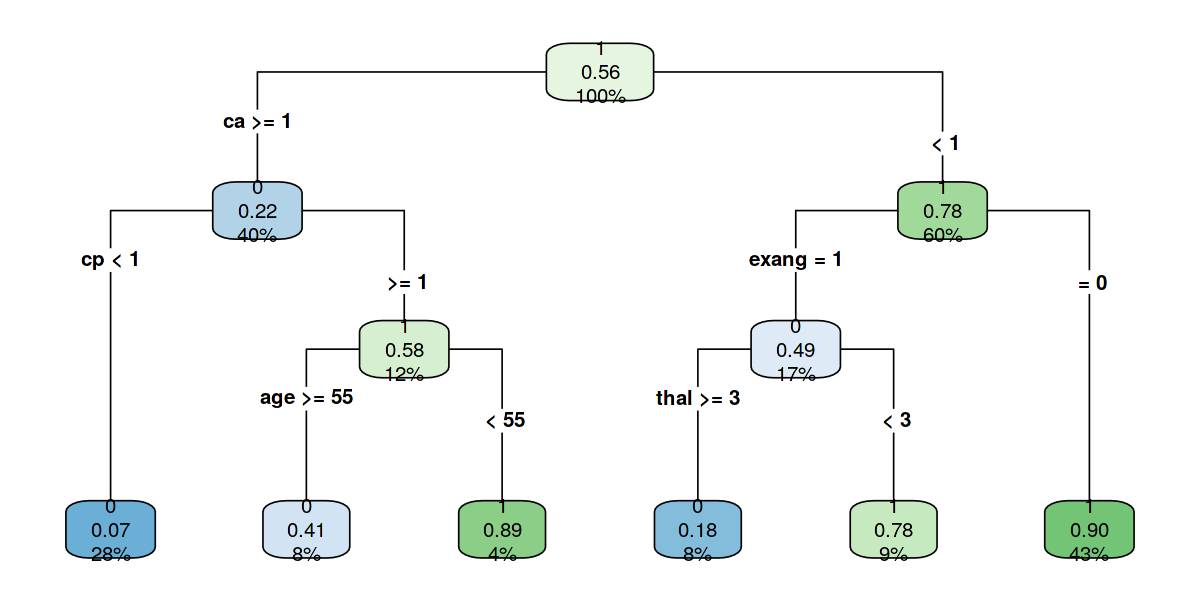

In [53]:
#Model and Prediction Decission Trees Training data
############ Attempt1 ############
DTm <- rpart(target~., data = heartPCAtarget,
method = "class",control = rpart.control(cp = 0))
plotcp(DTm)
# Prune the tree
loan_DTm_pruned <- prune(DTm, cp = 0)
rpart.plot(DTm,type=4,extra=106)
#Prediction of the model with the training data
predict_trainDT <-predict(loan_DTm_pruned, heartPCAtarget, type = 'class')

#Accuracy
dt_accTrain1 <- mean(predict_trainDT== heartPCAtarget$target)

############ Attempt2 ############
DTmA2 <- rpart(target~., data = heartOriginalPCAtarget,
method = "class",control = rpart.control(cp = 0))
plotcp(DTmA2)
# Prune the tree
loan_DTmA2_pruned <- prune(DTmA2, cp = 0)
rpart.plot(DTmA2,type=4,extra=106)

#Prediction of the model with the training data
predict_trainDTA2 <-predict(loan_DTmA2_pruned, heartOriginalPCAtarget, type = 'class')

#Accuracy
dt_accTrain2 <-  mean(predict_trainDTA2==heartOriginalPCAtarget$target)
#Confusion matrix with the training data
#table_mattrainDTA2 <- table(Predicted=predict_trainDTA2,Actual=heartOriginalPCAtarget$target)
#table_mattrainDTA2
#accuracy_TrainDTA2 <- mean(heartOriginalPCAtarget$target == predict_trainDTA2)
#print(paste('Accuracy for train Decission Tree A2:', accuracy_TrainDTA2 ))

############ Attempt3 ############
DTmA3 <- rpart(target~., data = heartOriginal_train,
method = "class",control = rpart.control(cp = 0))
plotcp(DTmA3)
# Prune the tree
loan_DTmA3_pruned <- prune(DTmA3, cp = 0)
rpart.plot(DTmA3,type=4,extra=106)

#Prediction of the model with the training data
predict_trainDTA3 <-predict(loan_DTmA3_pruned, heartOriginal_train, type = 'class')

#Accuracy
dt_accTrain3 <-  mean(predict_trainDTA3==heartOriginal_train$target)



In [54]:
#Decision Tree Testing Data
############ Attempt1 ############
#Prediction of the model with the training data
predict_trainTestDTA1 <-predict(DTm, heartPCAtargetTest, type = 'class')

############ Attempt2 ############
#Prediction of the model with the training data
predict_trainTestDTA2 <-predict(DTmA2, heartOriginalPCAtargetTest, type = 'class')

############ Attempt3 ############
#Prediction of the model with the training data
predict_trainTestDTA3 <-predict(DTmA3, heartOriginal_test, type = 'class')


In [55]:
#Confusion Matrix and Statstics of the Model with the training data for the Decission trees Models
############ Attempt1 ############
predict_trainDTf <- as.factor(predict_trainDT)
confusionMatrix(predict_trainDTf,heartPCAtarget$target)
dt_accTrain1 <-  round(mean(predict_trainDT==heartPCAtarget$target), digits=3)
############ Attempt2 ############
predict_trainDTA2f <- as.factor(predict_trainDTA2)
confusionMatrix(predict_trainDTA2f,heartOriginalPCAtarget$target)
dt_accTrain2 <-  round(mean(predict_trainDTA2==heartOriginalPCAtarget$target), digits=3)
############ Attempt3 ############
predict_trainDTA3f <- as.factor(predict_trainDTA3)
confusionMatrix(predict_trainDTA3f,heartOriginal_train$target)
dt_accTrain3 <-  round(mean(predict_trainDTA3==heartOriginal_train$target), digits=3)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  75   7
         1  22 112
                                          
               Accuracy : 0.8657          
                 95% CI : (0.8129, 0.9082)
    No Information Rate : 0.5509          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.7247          
                                          
 Mcnemar's Test P-Value : 0.00933         
                                          
            Sensitivity : 0.7732          
            Specificity : 0.9412          
         Pos Pred Value : 0.9146          
         Neg Pred Value : 0.8358          
             Prevalence : 0.4491          
         Detection Rate : 0.3472          
   Detection Prevalence : 0.3796          
      Balanced Accuracy : 0.8572          
                                          
       'Positive' Class : 0               
                              

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 72 18
         1 21 99
                                         
               Accuracy : 0.8143         
                 95% CI : (0.755, 0.8645)
    No Information Rate : 0.5571         
    P-Value [Acc > NIR] : 3.385e-15      
                                         
                  Kappa : 0.6224         
                                         
 Mcnemar's Test P-Value : 0.7488         
                                         
            Sensitivity : 0.7742         
            Specificity : 0.8462         
         Pos Pred Value : 0.8000         
         Neg Pred Value : 0.8250         
             Prevalence : 0.4429         
         Detection Rate : 0.3429         
   Detection Prevalence : 0.4286         
      Balanced Accuracy : 0.8102         
                                         
       'Positive' Class : 0              
                                         

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  79  14
         1  14 103
                                          
               Accuracy : 0.8667          
                 95% CI : (0.8131, 0.9095)
    No Information Rate : 0.5571          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7298          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8495          
            Specificity : 0.8803          
         Pos Pred Value : 0.8495          
         Neg Pred Value : 0.8803          
             Prevalence : 0.4429          
         Detection Rate : 0.3762          
   Detection Prevalence : 0.4429          
      Balanced Accuracy : 0.8649          
                                          
       'Positive' Class : 0               
                              

###### Calculation ROC and AUC curves with the Training data Decission Trees Models

Setting levels: control = 0, case = 1


Setting direction: controls < cases


[1] "Area Under the Curve AUC Decission Tree Model Training Data Attempt 1: 0.857186173438447"


Setting levels: control = 0, case = 1


Setting direction: controls < cases


[1] "Area Under the Curve AUC Decission Tree Model Training Data Attempt 2: 0.810173697270471"


Setting levels: control = 0, case = 1


Setting direction: controls < cases


[1] "Area Under the Curve AUC Decission Tree Model Training Data Attempt 3: 0.864902122966639"


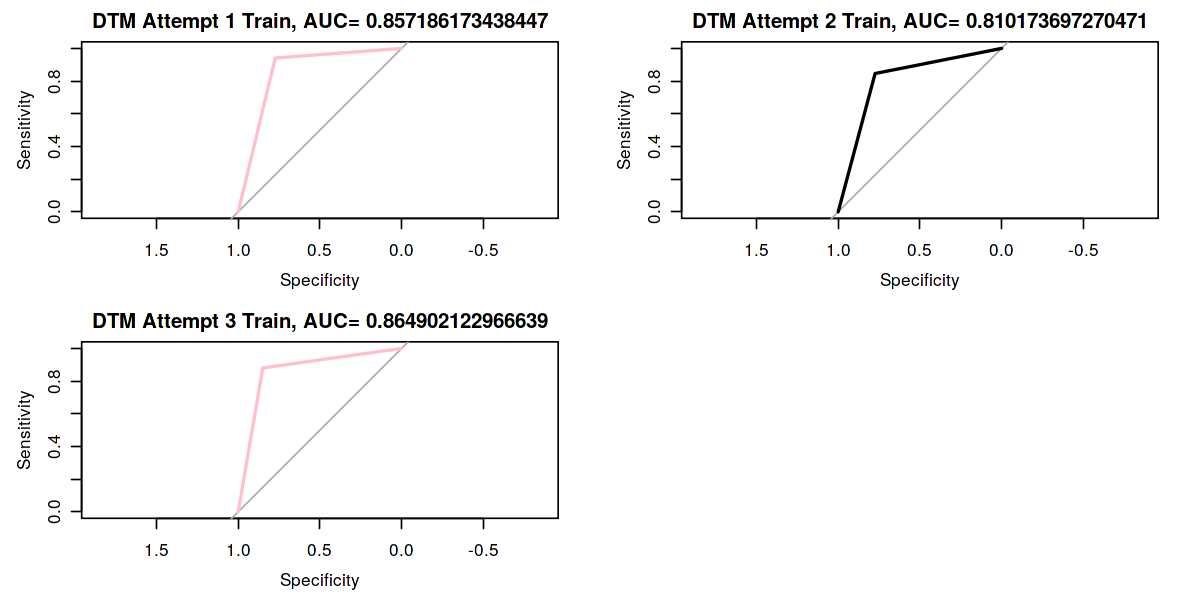

In [56]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(2,2))
############ Attempt1 ############
#convert factor to numeric
predict_trainDTn <- as.numeric(predict_trainDTf)
# Create a ROC curve A1 train DT
ROCA1TrainDT <- roc(heartPCAtarget$target, predict_trainDTn)
# Plot the ROC curve
plot(ROCA1TrainDT, main=paste("DTM Attempt 1 Train, AUC=",auc(ROCA1TrainDT)),col = "pink")
# Calculate the area under the curve Train DT (AUC)

print(paste('Area Under the Curve AUC Decission Tree Model Training Data Attempt 1:',auc(ROCA1TrainDT) ))
############ Attempt2 ############
#convert factor to numeric
predict_trainDTA2n <- as.numeric(predict_trainDTA2f)
# Create a ROC curve A2
ROCA2TrainDT <- roc(heartOriginalPCAtarget$target, predict_trainDTA2n)
# Plot the ROC curve

plot(ROCA2TrainDT, main=paste("DTM Attempt 2 Train, AUC=",auc(ROCA2TrainDT)),col = "black")
# Calculate the area under the curve Test(AUC)

print(paste('Area Under the Curve AUC Decission Tree Model Training Data Attempt 2:',auc(ROCA2TrainDT) ))
############ Attempt3 ############
#convert factor to numeric
predict_trainDTA3n <- as.numeric(predict_trainDTA3f)
# Create a ROC curve A3
ROCA3TrainDT <- roc(heartOriginal_train$target, predict_trainDTA3n)
# Plot the ROC curve

plot(ROCA3TrainDT, main=paste("DTM Attempt 3 Train, AUC=",auc(ROCA3TrainDT)),col = "pink")
# Calculate the area under the curve Test(AUC)

print(paste('Area Under the Curve AUC Decission Tree Model Training Data Attempt 3:',auc(ROCA3TrainDT) ))

In [57]:
#Confusion Matrix and Statstics of the Model with the testing data for the Decission trees Models
############ Attempt1 ############
predict_testDTf <- as.factor(predict_trainTestDTA1)
dt_accTest1 <-  round(mean(predict_testDTf==heartPCAtargetTest$target), digits=3)
dtcmA1Test <- confusionMatrix(predict_testDTf,heartPCAtargetTest$target,positive ="1")
dtbyClassA1Test <- dtcmA1Test$byClass
dt_senTest1 <- round(dtbyClassA1Test['Sensitivity'], digits=3)
dt_speTest1 <- round(dtbyClassA1Test['Specificity'],digits=3)
############ Attempt2 ############
predict_testDTA2f <- as.factor(predict_trainTestDTA2)
dt_accTest2 <-  round(mean(predict_testDTA2f==heartOriginalPCAtargetTest$target), digits=3)
dtcmA2Test <- confusionMatrix(predict_testDTA2f,heartOriginalPCAtargetTest$target,positive ="1")
dtbyClassA2Test <- dtcmA2Test$byClass
dt_senTest2 <- round(dtbyClassA2Test['Sensitivity'],digits=3)
dt_speTest2 <- round(dtbyClassA2Test['Specificity'],digits=3)
############ Attempt3 ############
predict_testDTA3f <- as.factor(predict_trainTestDTA3)
dt_accTest3 <-  round(mean(predict_testDTA3f==heartOriginal_test$target), digits=3)
dtcmA3Test <- confusionMatrix(predict_testDTA3f,heartOriginal_test$target,positive ="1")
dtbyClassA3Test <- dtcmA3Test$byClass
dt_senTest3 <- round(dtbyClassA3Test['Sensitivity'],digits=3)
dt_speTest3 <- round(dtbyClassA3Test['Specificity'],digits=3)

###### Calculation ROC and AUC curves with the Testing data Decission Trees Models

Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


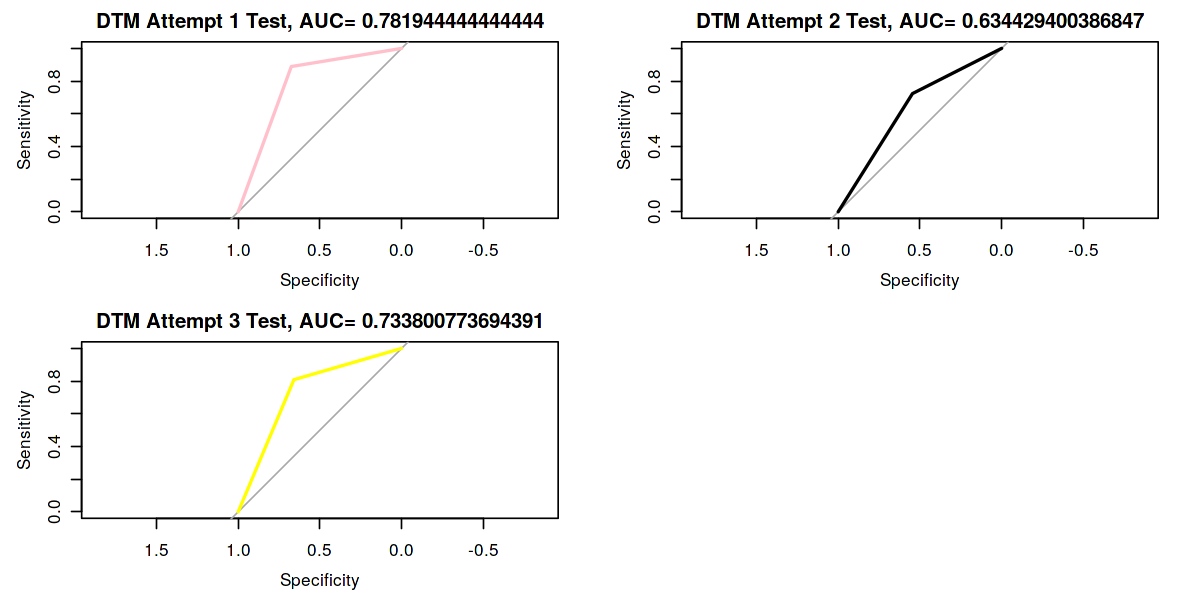

In [58]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(2,2))
############ Attempt1 ############
#convert factor to numeric
predict_testDTn <- as.numeric(predict_testDTf)
# Create a ROC curve A1 train DT
ROCA1TestDT <- roc(heartPCAtargetTest$target, predict_testDTn)
# Plot the ROC curve
plot(ROCA1TestDT, main=paste("DTM Attempt 1 Test, AUC=",auc(ROCA1TestDT)),col = "pink")
# Calculate the area under the curve Train DT (AUC)
dt_aucTest1 <- round(auc(ROCA1TestDT),digits=3)

############ Attempt2 ############
#convert factor to numeric
predict_testDTA2n <- as.numeric(predict_testDTA2f)
# Create a ROC curve A2
ROCA2TestDT <- roc(heartOriginalPCAtargetTest$target, predict_testDTA2n)
# Plot the ROC curve

plot(ROCA2TestDT, main=paste("DTM Attempt 2 Test, AUC=",auc(ROCA2TestDT)),col = "black")
# Calculate the area under the curve Test(AUC)
dt_aucTest2 <- round(auc(ROCA2TestDT),digits=3)
############ Attempt3 ############
#convert factor to numeric
predict_testDTA3n <- as.numeric(predict_testDTA3f)
# Create a ROC curve A3
ROCA3TestDT <- roc(heartOriginal_test$target, predict_testDTA3n)
# Plot the ROC curve

plot(ROCA3TestDT, main=paste("DTM Attempt 3 Test, AUC=",auc(ROCA3TestDT)),col = "yellow")
# Calculate the area under the curve Test(AUC)
dt_aucTest3 <- round(auc(ROCA3TestDT),digits=3)

In [59]:
print ("-----------DECISION TREES MODEL ACCURACIES-----------",quote=FALSE)
print(paste("Accuracy train Attempt1: ",dt_accTrain1),quote=FALSE)
print(paste("Accuracy test Attempt1: ",dt_accTest1),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt2: ",dt_accTrain2),quote=FALSE)
print(paste("Accuracy test Attempt2: ",dt_accTest2),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt3: ",dt_accTrain3),quote=FALSE)
print(paste("Accuracy test Attempt3: ",dt_accTest3),quote=FALSE)

[1] -----------DECISION TREES MODEL ACCURACIES-----------


[1] Accuracy train Attempt1:  0.866


[1] Accuracy test Attempt1:  0.788


[1] --------------------------------------------


[1] Accuracy train Attempt2:  0.814


[1] Accuracy test Attempt2:  0.637


[1] --------------------------------------------


[1] Accuracy train Attempt3:  0.867


[1] Accuracy test Attempt3:  0.736


#### Random Forest

In [60]:
library("randomForest")
#Random Forest Training data
############ Attempt1 ############
RFA1 <- randomForest(target~., data = heartPCAtarget)
#Predicted model of the random forest training data
RFpredTrainA1 <- predict(RFA1,heartPCAtarget)
#Predicted model of the random forest testing data
RFpredTestA1 <- predict(RFA1,heartPCAtargetTest)

############ Attempt2 ############
RFA2 <- randomForest(target~., data = heartOriginalPCAtarget)
#Predicted model of the random forest training data
RFpredTrainA2 <- predict(RFA2,heartOriginalPCAtarget)
# Predicted model of the random forest testing data
RFpredTestA2 <- predict(RFA2,heartOriginalPCAtargetTest)

############ Attempt3 ############
RFA3 <- randomForest(target~., data = heartOriginal_train)
#Predicted model of the random forest training data
RFpredTrainA3 <- predict(RFA3,heartOriginal_train)
# Predicted model of the random forest testing data
RFpredTestA3 <- predict(RFA3,heartOriginal_test)

randomForest 4.6-14


Type rfNews() to see new features/changes/bug fixes.



Attaching package: ‘randomForest’



The following object is masked from ‘package:gridExtra’:

    combine



The following object is masked from ‘package:dplyr’:

    combine



The following object is masked from ‘package:ggplot2’:

    margin



In [61]:
#Confusion Matrix Training Data Random Forest
############ Attempt1 ############
RFpredTrainA1f  <- as.factor(RFpredTrainA1)
rt_accTrain1 <- round(mean(RFpredTrainA1f ==heartPCAtarget$target), digits=3)
rtcmA1Train <- confusionMatrix(RFpredTrainA1f,heartPCAtarget$target)
############ Attempt2 ############
RFpredTrainA2f  <- as.factor(RFpredTrainA2)
rt_accTrain2 <- round(mean(RFpredTrainA2f ==heartOriginalPCAtarget$target), digits=3)
confusionMatrix(RFpredTrainA2f,heartOriginalPCAtarget$target)
############ Attempt3 ############
RFpredTrainA3f  <- as.factor(RFpredTrainA3)
rt_accTrain3 <- round(mean(RFpredTrainA3f ==heartOriginal_train$target), digits=3)
confusionMatrix(RFpredTrainA3f,heartOriginal_train$target)


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  93   0
         1   0 117
                                     
               Accuracy : 1          
                 95% CI : (0.9826, 1)
    No Information Rate : 0.5571     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.4429     
         Detection Rate : 0.4429     
   Detection Prevalence : 0.4429     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0  93   0
         1   0 117
                                     
               Accuracy : 1          
                 95% CI : (0.9826, 1)
    No Information Rate : 0.5571     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.4429     
         Detection Rate : 0.4429     
   Detection Prevalence : 0.4429     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

In [62]:
#Confusion Matrix Testing Data Random Forest
############ Attempt1 ############
#RFpredTestA1f  <- as.factor(RFpredTestA1)
#(CMRFA1 <- confusionMatrix(RFpredTestA1f,heartPCAtargetTest$target))
#fourfoldplot(CMRFA1$table,color = c("#CC6666", "#99CC99"),
 #               conf.level = 0, margin = 1, main = "Confusion Matrix")

############ Attempt2 ############
#RFpredTestA2f  <- as.factor(RFpredTestA2)
#(CMRFA2 <- confusionMatrix(RFpredTestA2f,heartOriginalPCAtargetTest$target))
#fourfoldplot(CMRFA2$table,color = c("#CC6666", "#99CC99"),
 #               conf.level = 0, margin = 1, main = "Confusion Matrix")
############ Attempt3 ############
#RFpredTestA3f  <- as.factor(RFpredTestA3)
#(CMRFA3 <- confusionMatrix(RFpredTestA3f,heartOriginal_test$target))
#fourfoldplot(CMRFA3$table,color = c("#CC6666", "#99CC99"),
 #               conf.level = 0, margin = 1, main = "Confusion Matrix")





#Confusion Matrix and Statstics of the Model with the testing data for the Random Forest Models:
############ Attempt1 ############
RFpredTestA1f  <- as.factor(RFpredTestA1)
rt_accTest1 <-  round(mean(RFpredTestA1f ==heartPCAtargetTest$target), digits=3)
rtcmA1Test <- confusionMatrix(RFpredTestA1f ,heartPCAtargetTest$target,positive ="1")
rtbyClassA1Test <- rtcmA1Test$byClass
rt_senTest1 <- round(rtbyClassA1Test['Sensitivity'], digits=3)
rt_speTest1 <- round(rtbyClassA1Test['Specificity'],digits=3)
############ Attempt2 ############
RFpredTestA2f  <- as.factor(RFpredTestA2)
rt_accTest2 <-  round(mean(RFpredTestA2f==heartOriginalPCAtargetTest$target), digits=3)
rtcmA2Test <- confusionMatrix(RFpredTestA2f,heartOriginalPCAtargetTest$target,positive ="1")
rtbyClassA2Test <- rtcmA2Test$byClass
rt_senTest2 <- round(rtbyClassA2Test['Sensitivity'],digits=3)
rt_speTest2 <- round(rtbyClassA2Test['Specificity'],digits=3)
############ Attempt3 ############
RFpredTestA3f  <- as.factor(RFpredTestA3)
rt_accTest3 <-  round(mean(RFpredTestA3f==heartOriginal_test$target), digits=3)
rtcmA3Test <- confusionMatrix(RFpredTestA3f,heartOriginal_test$target,positive ="1")
rtbyClassA3Test <- rtcmA3Test$byClass
rt_senTest3 <- round(rtbyClassA3Test['Sensitivity'],digits=3)
rt_speTest3 <- round(rtbyClassA3Test['Specificity'],digits=3)

###### Calculation ROC and AUC curves with the Testing data Random Forest Models

Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


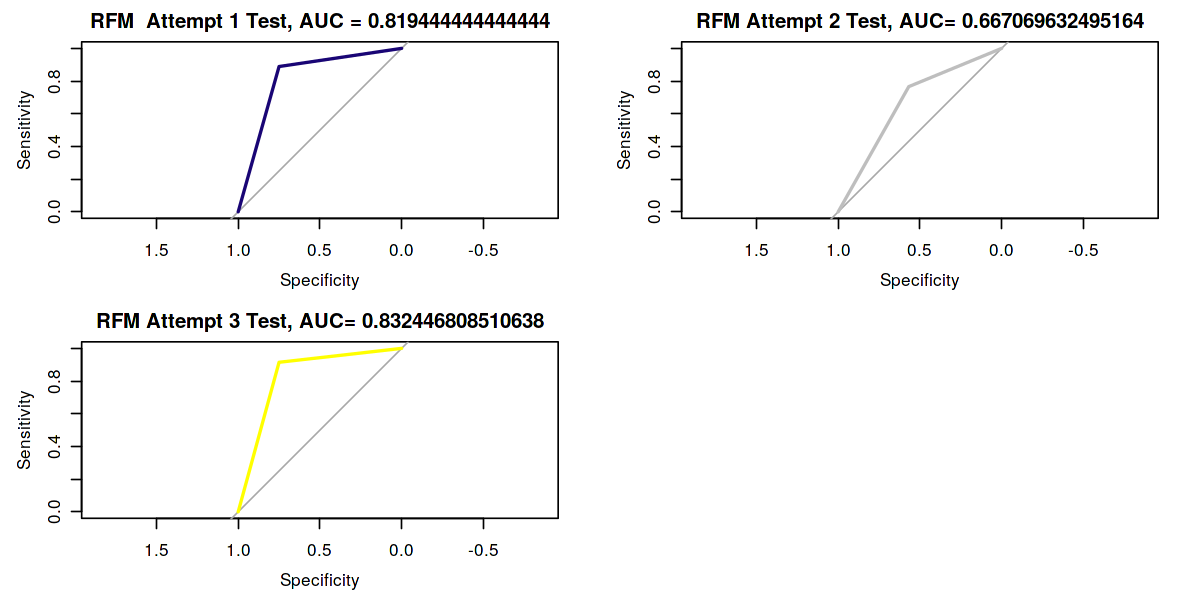

In [63]:
############ Attempt1 ############
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(2,2))
#convert factor to numeric
RFpredTestA1n <- as.numeric(RFpredTestA1f)
# Create a ROC curve A1 train DT
ROCA1TestRF <- roc(heartPCAtargetTest$target, RFpredTestA1n)
# Plot the ROC curve
plot(ROCA1TestRF, main = paste("RFM  Attempt 1 Test, AUC =",auc(ROCA1TestRF)), col ="#190575")
# Calculate the area under the curve Train DT (AUC)
rt_aucTest1 <- round(auc(ROCA1TestRF),digits=3)

############ Attempt2 ############
#convert factor to numeric
RFpredTestA2n <- as.numeric(RFpredTestA2f)
# Create a ROC curve A2
ROCA2TestRF <- roc(heartOriginalPCAtargetTest$target, RFpredTestA2n)
# Plot the ROC curve
plot(ROCA2TestRF, main=paste("RFM Attempt 2 Test, AUC=",auc(ROCA2TestRF )), col = "gray")
# Calculate the area under the curve Test(AUC)
rt_aucTest2 <- round(auc(ROCA2TestRF),digits=3)
############ Attempt3 ############
#convert factor to numeric
RFpredTestA3n <- as.numeric(RFpredTestA3f)
# Create a ROC curve A3
ROCA3TestRF <- roc(heartOriginal_test$target, RFpredTestA3n)
# Plot the ROC curve
plot(ROCA3TestRF, main=paste("RFM Attempt 3 Test, AUC=",auc(ROCA3TestRF)),col = "yellow")
# Calculate the area under the curve Test(AUC)
rt_aucTest3 <- round(auc(ROCA3TestRF),digits=3)

In [64]:
print ("-----------RANDOM FOREST MODEL ACCURACIES-----------",quote=FALSE)
print(paste("Accuracy train Attempt1: ",rt_accTrain1),quote=FALSE)
print(paste("Accuracy test Attempt1: ",rt_accTest1),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt2: ",rt_accTrain2),quote=FALSE)
print(paste("Accuracy test Attempt2: ",rt_accTest2),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt3: ",rt_accTrain3),quote=FALSE)
print(paste("Accuracy test Attempt3: ",rt_accTest3),quote=FALSE)

[1] -----------RANDOM FOREST MODEL ACCURACIES-----------


[1] Accuracy train Attempt1:  1


[1] Accuracy test Attempt1:  0.824


[1] --------------------------------------------


[1] Accuracy train Attempt2:  1


[1] Accuracy test Attempt2:  0.67


[1] --------------------------------------------


[1] Accuracy train Attempt3:  1


[1] Accuracy test Attempt3:  0.835


##### Cross-validation RF

In [65]:
ctrl <- trainControl(method = "none")

set.seed(2)
rforestcv <- train(target ~ ., data = heartPCAtarget,
               method = "rf",
               ntree = 1000,
               trControl = ctrl,
               tuneGrid = data.frame(mtry = 4))


In [66]:
# Predicting the results with cross-validation
RF_CV1predTrain <- predict(rforestcv, newdata = heartPCAtarget) #Train
RF_CV1predTest <- predict(rforestcv, newdata = heartPCAtargetTest) #Test

# Making the Confusion Matrix
RF_CVcfTrain2 <-confusionMatrix(RF_CV1predTrain,heartPCAtarget$target, positive ="1")
RF_CVcfTest2 <-confusionMatrix(RF_CV1predTest,heartPCAtargetTest$target, positive ="1")

# Compute the accuracy
RF_CVAcc1Train <-mean(RF_CV1predTrain == heartPCAtarget$target) #Attempt1 Train
RF_CVAcc1Test <-mean(RF_CV1predTest == heartPCAtargetTest$target) #Attempt1 Test

In [67]:
#Comparison with the previous accuracies
print("-----TRAIN-----",quote=FALSE)
rt_accTrain1
RF_CVAcc1Train

print("-----TEST------",quote=FALSE)
rt_accTest1
RF_CVAcc1Test

[1] -----TRAIN-----


[1] 1

[1] 1

[1] -----TEST------


[1] 0.824

[1] 0.8470588

#### SVM

In [68]:
############ Attempt1 LINEAR ############
# Fitting SVM to the Training set
SVM_linear1 <- svm(formula = target~ .,
                 data = heartPCAtarget,
                 type = 'C-classification',
                 kernel = 'linear')

# Predicting the results
SVM_linear1predTrain <- predict(SVM_linear1, newdata = heartPCAtarget) #Train
SVM_linear1predTest <- predict(SVM_linear1, newdata = heartPCAtargetTest) #Test

# Making the Confusion Matrix
print("Train Attempt1",quote=FALSE)
table(SVM_linear1predTrain, heartPCAtarget$target,dnn=c("Prediction","Actual"))
print("Test Attempt1",quote=FALSE)
table(SVM_linear1predTest, heartPCAtargetTest$target,dnn=c("Prediction","Actual"))

# Compute the accuracy
SVM_linearAcc1Train <-mean(SVM_linear1predTrain == heartPCAtarget$target) #Attempt1 Train
SVM_linearAcc1Test <-mean(SVM_linear1predTest == heartPCAtargetTest$target) #Attempt1 Test

[1] Train Attempt1


          Actual
Prediction   0   1
         0  81  16
         1  16 103

[1] Test Attempt1


          Actual
Prediction  0  1
         0 32  6
         1  8 39

In [69]:
############ Attempt1 RADIAL ############
# Fitting SVM to the Training set
SVM_radial1 <- svm(formula = target~ .,
                 data = heartPCAtarget,
                 type = 'C-classification',
                 kernel = 'radial')

# Predicting the results
SVM_radial1predTrain <- predict(SVM_radial1, newdata = heartPCAtarget) #Train
SVM_radial1predTest <- predict(SVM_radial1, newdata = heartPCAtargetTest) #Test
# Making the Confusion Matrix
print("Train Attempt1 RADIAL",quote=FALSE)
table(SVM_radial1predTrain, heartPCAtarget$target,dnn=c("Prediction","Actual"))
SVM_cfTrain1 <-confusionMatrix(SVM_radial1predTrain,heartPCAtarget$target, positive ="1")

print("Test Attempt1 RADIAL",quote=FALSE)
table(SVM_radial1predTest, heartPCAtargetTest$target,dnn=c("Prediction","Actual"))
SVM_cfTest1 <-confusionMatrix(SVM_radial1predTest,heartPCAtargetTest$target, positive ="1")

# Compute the accuracy
SVM_radialAcc1Train <-mean(SVM_radial1predTrain == heartPCAtarget$target) #Attempt1 Train
SVM_radialAcc1Test <-mean(SVM_radial1predTest == heartPCAtargetTest$target) #Attempt1 Test

[1] Train Attempt1 RADIAL


          Actual
Prediction   0   1
         0  79  14
         1  18 105

[1] Test Attempt1 RADIAL


          Actual
Prediction  0  1
         0 30  7
         1 10 38

In [70]:
############ Attempt1 POLYNOMIAL ############
# Fitting SVM to the Training set
SVM_polynomial1 <- svm(formula = target~ .,
                 data = heartPCAtarget,
                 type = 'C-classification',
                 kernel = 'polynomial')

# Predicting the results
SVM_polynomial1predTrain <- predict(SVM_polynomial1, newdata = heartPCAtarget) #Train
SVM_polynomial1predTest <- predict(SVM_polynomial1, newdata = heartPCAtargetTest) #Test
# Making the Confusion Matrix
print("Train Attempt1 POLYNOMIAL",quote=FALSE)
table(SVM_polynomial1predTrain, heartPCAtarget$target,dnn=c("Prediction","Actual"))
print("Test Attempt1 POLYNOMIAL",quote=FALSE)
table(SVM_polynomial1predTest, heartPCAtargetTest$target,dnn=c("Prediction","Actual"))
# Compute the accuracy
SVM_polynomialAcc1Train <-mean(SVM_polynomial1predTrain == heartPCAtarget$target) #Attempt1 Train
SVM_polynomialAcc1Test <-mean(SVM_polynomial1predTest == heartPCAtargetTest$target) #Attempt1 Test

[1] Train Attempt1 POLYNOMIAL


          Actual
Prediction   0   1
         0  78  17
         1  19 102

[1] Test Attempt1 POLYNOMIAL


          Actual
Prediction  0  1
         0 32  8
         1  8 37

In [71]:
############ Attempt1 SIGMOID ############
# Fitting SVM to the Training set
SVM_sigmoid1 <- svm(formula = target~ .,
                 data = heartPCAtarget,
                 type = 'C-classification',
                 kernel = 'sigmoid')

# Predicting the results
SVM_sigmoid1predTrain <- predict(SVM_sigmoid1, newdata = heartPCAtarget) #Train
SVM_sigmoid1predTest <- predict(SVM_sigmoid1, newdata = heartPCAtargetTest) #Test
# Making the Confusion Matrix
print("Train Attempt1 SIGMOID",quote=FALSE)
table(SVM_sigmoid1predTrain, heartPCAtarget$target,dnn=c("Prediction","Actual"))
print("Test Attempt1 SIGMOID",quote=FALSE)
table(SVM_sigmoid1predTest, heartPCAtargetTest$target,dnn=c("Prediction","Actual"))
# Compute the accuracy
SVM_sigmoidAcc1Train <-mean(SVM_sigmoid1predTrain == heartPCAtarget$target) #Attempt1 Train
SVM_sigmoidAcc1Test <-mean(SVM_sigmoid1predTest == heartPCAtargetTest$target) #Attempt1 Test

[1] Train Attempt1 SIGMOID


          Actual
Prediction  0  1
         0 70 20
         1 27 99

[1] Test Attempt1 SIGMOID


          Actual
Prediction  0  1
         0 28  8
         1 12 37

In [72]:
print ("-----------SVM ATTEMPT1 LINEAR ACCURACY-----------",quote=FALSE)
print(paste("Accuracy train: ",SVM_linearAcc1Train),quote=FALSE)
print(paste("Accuracy test: ",SVM_linearAcc1Test),quote=FALSE)

print ("-----------SVM ATTEMPT1 RADIAL ACCURACY-----------",quote=FALSE)
print(paste("Accuracy train: ",SVM_radialAcc1Train),quote=FALSE)
print(paste("Accuracy test: ",SVM_radialAcc1Test),quote=FALSE)

print ("---------SVM ATTEMPT1 POLYNOMIAL ACCURACY---------",quote=FALSE)
print(paste("Accuracy train: ",SVM_polynomialAcc1Train),quote=FALSE)
print(paste("Accuracy test: ",SVM_polynomialAcc1Test),quote=FALSE)

print ("----------SVM ATTEMPT1 SIGMOID ACCURACY-----------",quote=FALSE)
print(paste("Accuracy train: ",SVM_sigmoidAcc1Train),quote=FALSE)
print(paste("Accuracy test: ",SVM_sigmoidAcc1Test),quote=FALSE)

[1] -----------SVM ATTEMPT1 LINEAR ACCURACY-----------


[1] Accuracy train:  0.851851851851852


[1] Accuracy test:  0.835294117647059


[1] -----------SVM ATTEMPT1 RADIAL ACCURACY-----------


[1] Accuracy train:  0.851851851851852


[1] Accuracy test:  0.8


[1] ---------SVM ATTEMPT1 POLYNOMIAL ACCURACY---------


[1] Accuracy train:  0.833333333333333


[1] Accuracy test:  0.811764705882353


[1] ----------SVM ATTEMPT1 SIGMOID ACCURACY-----------


[1] Accuracy train:  0.782407407407407


[1] Accuracy test:  0.764705882352941


In [73]:
############ Attempt2 ############
# Fitting SVM to the Training set
SVM_radial2 <- svm(formula = target~ .,
                 data = heartOriginalPCAtarget,
                 type = 'C-classification',
                 kernel = 'radial')

# Predicting the results
SVM_radial2predTrain <- predict(SVM_radial2, newdata = heartOriginalPCAtarget) #Train
SVM_radial2predTest <- predict(SVM_radial2, newdata = heartOriginalPCAtargetTest) #Test

# Making the Confusion Matrix
SVM_cfTrain2 <-confusionMatrix(SVM_radial2predTrain,heartOriginalPCAtarget$target, positive ="1")
SVM_cfTest2 <-confusionMatrix(SVM_radial2predTest,heartOriginalPCAtargetTest$target, positive ="1")

# Compute the accuracy
SVM_radialAcc2Train <-mean(SVM_radial2predTrain == heartOriginalPCAtarget$target) #Attempt2 Train
SVM_radialAcc2Test <-mean(SVM_radial2predTest == heartOriginalPCAtargetTest$target) #Attempt2 Test

In [74]:
############ Attempt3 ############
# Fitting SVM to the Training set
SVM_radial3 <- svm(formula = target~ .,
                 data = heartOriginal_train,
                 type = 'C-classification',
                 kernel = 'radial')

# Predicting the results
SVM_radial3predTrain <- predict(SVM_radial3, newdata = heartOriginal_train) #Train
SVM_radial3predTest <- predict(SVM_radial3, newdata = heartOriginal_test) #Test

# Making the Confusion Matrix
SVM_cfTrain3 <-confusionMatrix(SVM_radial3predTrain,heartOriginal_train$target, positive ="1")
SVM_cfTest3 <-confusionMatrix(SVM_radial3predTest,heartOriginal_test$target, positive ="1")

# Compute the accuracy

SVM_radialAcc3Train <-mean(SVM_radial3predTrain == heartOriginal_train$target) #Attempt3 Train
SVM_radialAcc3Test <-mean(SVM_radial3predTest == heartOriginal_test$target) #Attempt3 Test

In [75]:
#Test with different partitions for the splitting data
accuracy <- rep(NA,100)
for (i in 1:100){
  	#assign 80% of the data to the training set
    heartForLatterUse[, "train"] <- ifelse(runif(nrow(heartForLatterUse)) < 0.7, 1, 0)
    trainColNum <- grep("train", names(heartForLatterUse))
    trainset <- heartForLatterUse[heartForLatterUse$train == 1, -trainColNum]
    testset <- heartForLatterUse[heartForLatterUse$train == 0, -trainColNum]
  	#build model using training data
    svm_model <- svm(target~ ., data = trainset,
                     type = "C-classification", kernel = "linear")
  	#calculate accuracy on test data
    pred_test <- predict(svm_model, testset)
    accuracy[[i]] <- mean(pred_test == testset$target)
}
mean(accuracy)
sd(accuracy)

[1] 0.8307155

[1] 0.04280826

In [76]:
print ("------------SVM RADIAL ACCURACIES-----------",quote=FALSE)
print(paste("Accuracy train Attempt1: ",SVM_radialAcc1Train),quote=FALSE)
print(paste("Accuracy test Attempt1: ",SVM_radialAcc1Test),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt2: ",SVM_radialAcc2Train),quote=FALSE)
print(paste("Accuracy test Attempt2: ",SVM_radialAcc2Test),quote=FALSE)

print ("--------------------------------------------",quote=FALSE)
print(paste("Accuracy train Attempt3: ",SVM_radialAcc3Train),quote=FALSE)
print(paste("Accuracy test Attempt3: ",SVM_radialAcc3Test),quote=FALSE)

[1] ------------SVM RADIAL ACCURACIES-----------


[1] Accuracy train Attempt1:  0.851851851851852


[1] Accuracy test Attempt1:  0.8


[1] --------------------------------------------


[1] Accuracy train Attempt2:  0.719047619047619


[1] Accuracy test Attempt2:  0.681318681318681


[1] --------------------------------------------


[1] Accuracy train Attempt3:  0.904761904761905


[1] Accuracy test Attempt3:  0.78021978021978


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


Setting levels: control = 0, case = 1


Setting direction: controls < cases


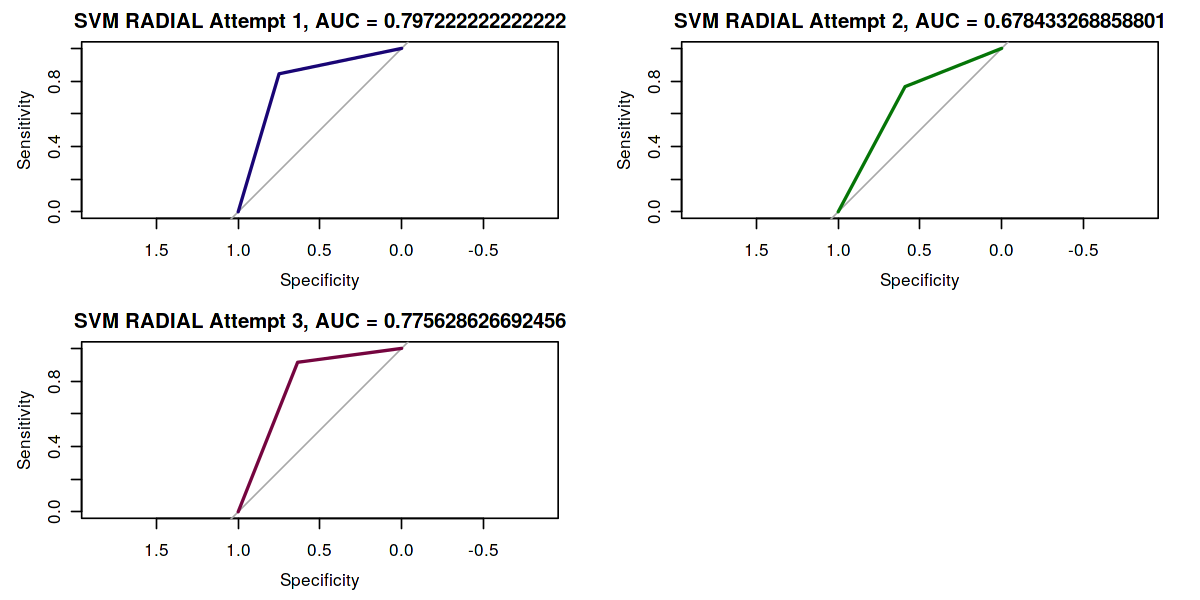

In [77]:
### ROC CURVES FOR SVM RADIAL ###

SVM_ROCTest1 <- roc(heartPCAtargetTest$target, as.numeric(SVM_radial1predTest))
SVM_ROCTest2 <- roc(heartOriginalPCAtargetTest$target, as.numeric(SVM_radial2predTest))
SVM_ROCTest3 <- roc(heartOriginal_test$target, as.numeric(SVM_radial3predTest))

# Plot the ROC curve
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(2,2))
plot(SVM_ROCTest1, main = paste("SVM RADIAL Attempt 1, AUC =",auc(SVM_ROCTest1)), col ="#190575")
plot(SVM_ROCTest2, main = paste("SVM RADIAL Attempt 2, AUC =",auc(SVM_ROCTest2)), col ="#057507")
plot(SVM_ROCTest3, main = paste("SVM RADIAL Attempt 3, AUC =",auc(SVM_ROCTest3)), col ="#75053f")

In [78]:
## Performance metrics ##
############ Attempt1 ############
SVM_accTest1 <- round(SVM_radialAcc1Train, digits = 3)
SVM_senTest1 <- round(sensitivity(SVM_radial1predTest,heartPCAtargetTest$target), digits = 3)
SVM_speTest1 <- round(specificity(SVM_radial1predTest,heartPCAtargetTest$target), digits = 3)
SVM_aucTest1 <- round(auc(SVM_ROCTest1), digits = 3)
############ Attempt2 ############
SVM_accTest2 <- round(SVM_radialAcc2Train, digits = 3)
SVM_senTest2 <- round(sensitivity(SVM_radial2predTest,heartOriginalPCAtargetTest$target), digits = 3)
SVM_speTest2 <- round(specificity(SVM_radial2predTest,heartOriginalPCAtargetTest$target), digits = 3)
SVM_aucTest2 <- round(auc(SVM_ROCTest2), digits = 3)
############ Attempt3 ############
SVM_accTest3 <- round(SVM_radialAcc3Train, digits = 3)
SVM_senTest3 <- round(sensitivity(SVM_radial3predTest,heartOriginal_test$target), digits = 3)
SVM_speTest3 <- round(specificity(SVM_radial3predTest,heartOriginal_test$target), digits = 3)
SVM_aucTest3 <- round(auc(SVM_ROCTest3), digits = 3)

##### Cross-validation

https://www.youtube.com/watch?v=OwPQHmiJURI

https://blog.revolutionanalytics.com/2015/10/the-5th-tribe-support-vector-machines-and-caret.html

In [79]:
set.seed(42)
parameterGrid <-expand.grid(sigma = c(.01, .015, 0.2),
                    C = c(0.75, 0.9, 1, 1.1, 1.25))
SVM_CV1<- train(target ~., heartPCAtarget,
               method="svmRadial",
              trControl = trainControl(
              method ="cv", number = 10,
              , savePredictions = TRUE),
               tuneGrid = parameterGrid
              )

In [80]:
# Predicting the results with cross-validation
SVM_CV1predTrain <- predict(SVM_CV1, newdata = heartPCAtarget) #Train
SVM_CV1predTest <- predict(SVM_CV1, newdata = heartPCAtargetTest) #Test

# Making the Confusion Matrix
SVM_CVcfTrain2 <-confusionMatrix(SVM_CV1predTrain,heartPCAtarget$target, positive ="1")
SVM_CVcfTest2 <-confusionMatrix(SVM_CV1predTest,heartPCAtargetTest$target, positive ="1")

# Compute the accuracy
SVM_CVAcc1Train <-mean(SVM_CV1predTrain == heartPCAtarget$target) #Attempt1 Train
SVM_CVAcc1Test <-mean(SVM_CV1predTest == heartPCAtargetTest$target) #Attempt1 Test

In [81]:
#Comparison with the previous accuracies
print("-----TRAIN-----",quote=FALSE)
SVM_radialAcc1Train
SVM_CVAcc1Train

print("-----TEST------",quote=FALSE)
SVM_accTest1
SVM_CVAcc1Test

[1] -----TRAIN-----


[1] 0.8518519

[1] 0.8611111

[1] -----TEST------


[1] 0.852

[1] 0.8

#### Summary of models

##### Confusion matrices

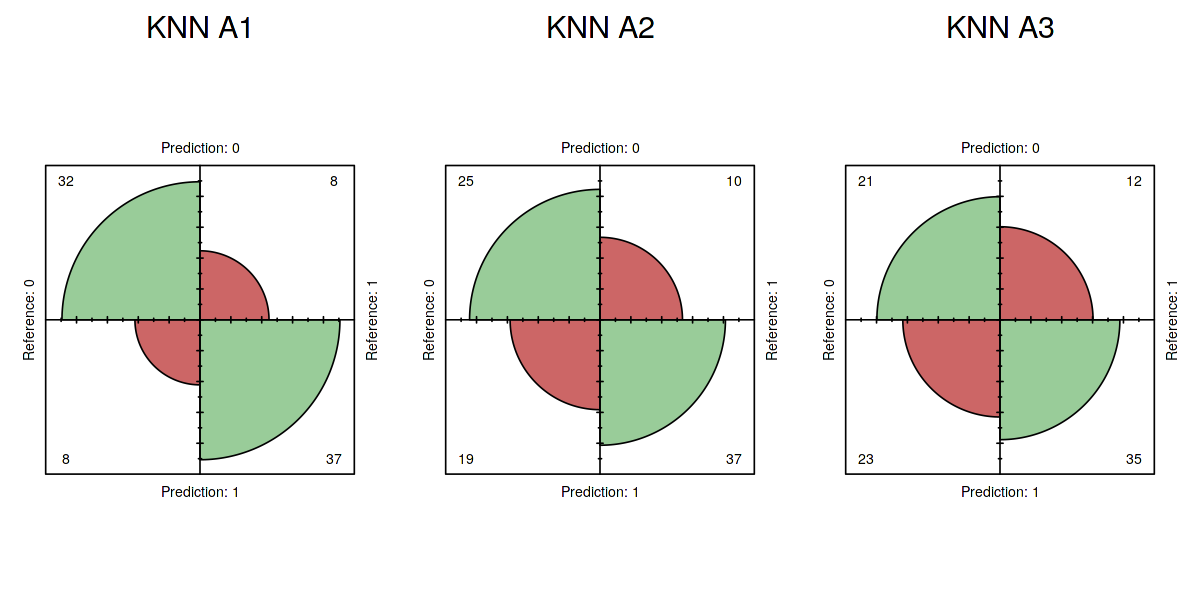

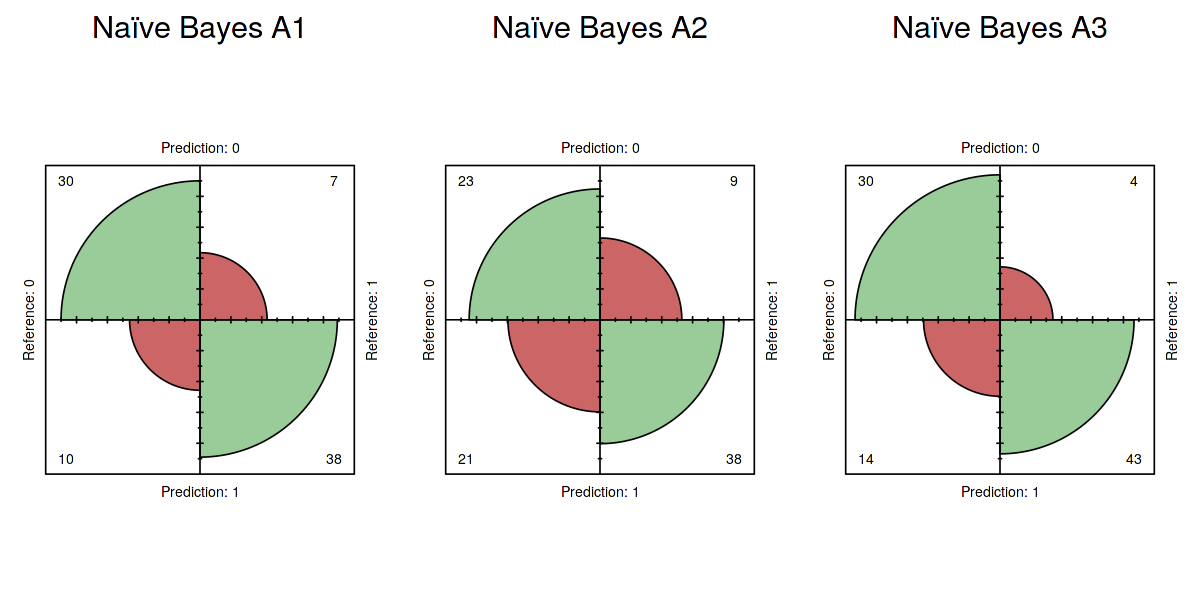

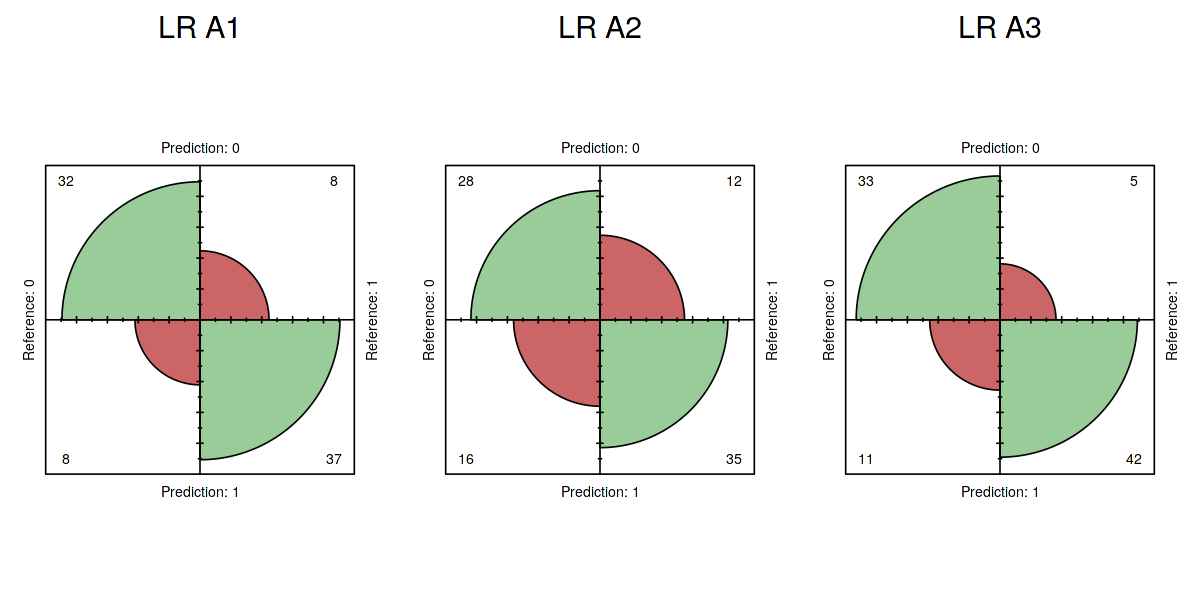

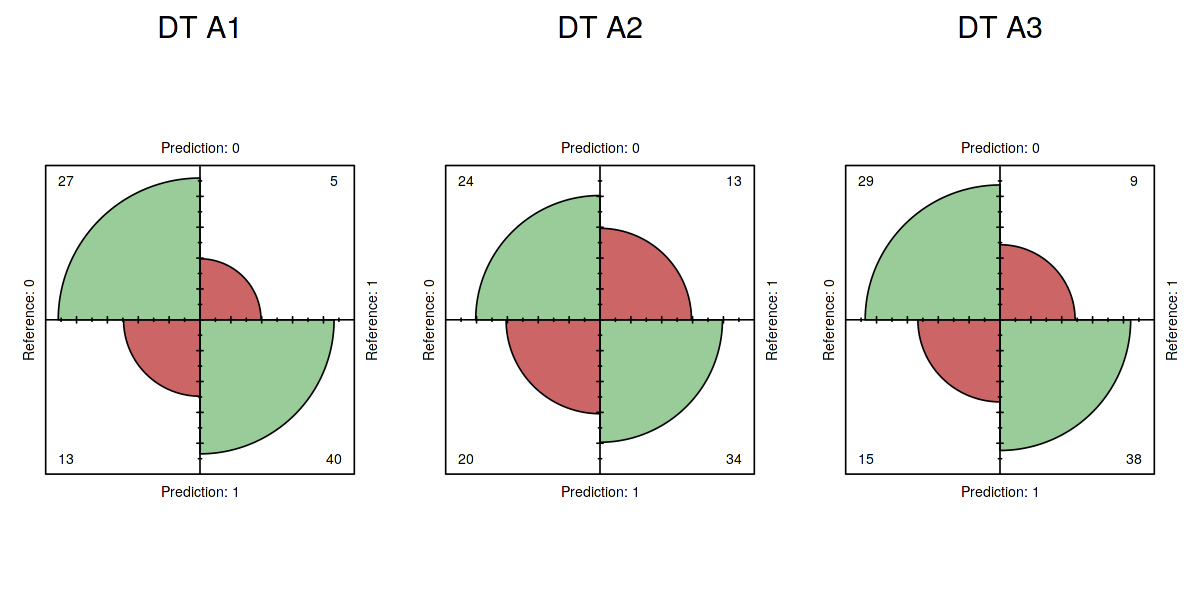

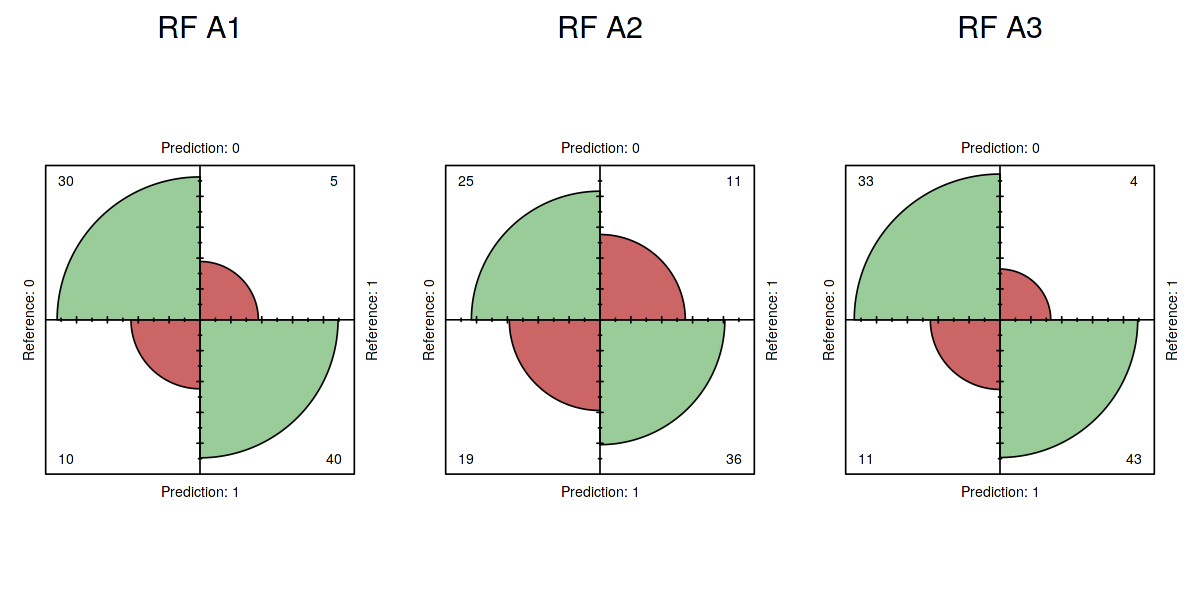

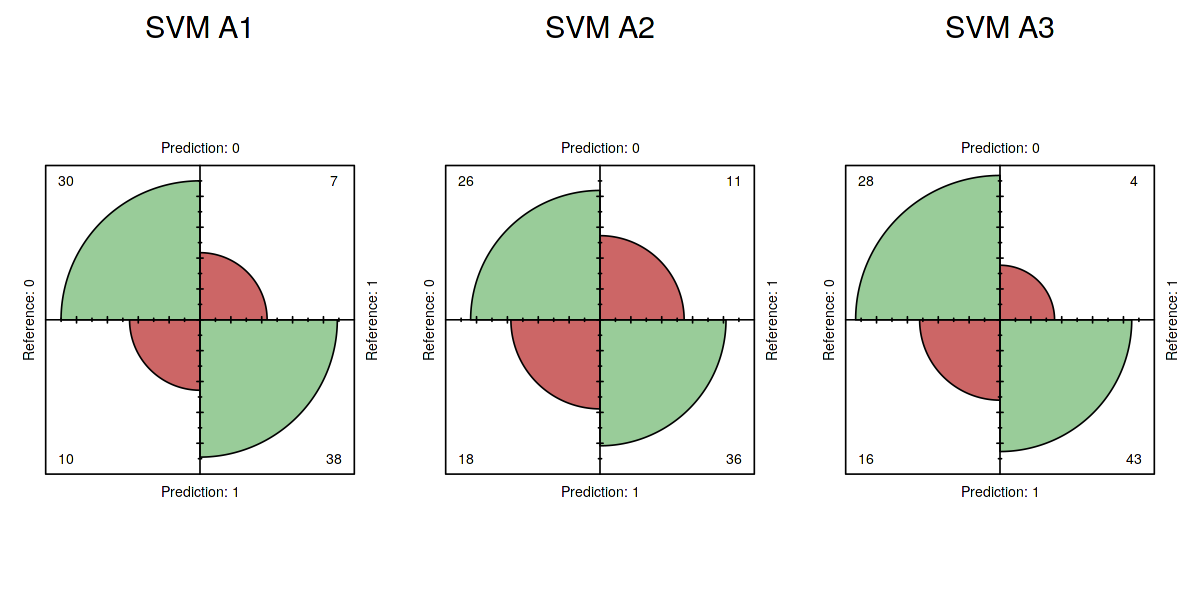

In [82]:
############### KNN ##############
par(mfrow=c(1,3))
fourfoldplot(knn_cfTest1$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "KNN A1")
fourfoldplot(knn_cfTest2$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "KNN A2")
fourfoldplot(knn_cfTest3$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "KNN A3")

########### Naïve Bayes ##########
par(mfrow=c(1,3))
fourfoldplot(nb_cfTest1$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "Naïve Bayes A1")
fourfoldplot(nb_cfTest2$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "Naïve Bayes A2")
fourfoldplot(nb_cfTest3$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "Naïve Bayes A3")
########### Logistic Regression ##########
par(mfrow=c(1,3))
fourfoldplot(lrcmA1Test$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "LR A1")
fourfoldplot(lrcmA2Test$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "LR A2")
fourfoldplot(lrcmA3Test$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "LR A3")

########### Decission Trees ##########
par(mfrow=c(1,3))
fourfoldplot(dtcmA1Test$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "DT A1")
fourfoldplot(dtcmA2Test$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "DT A2")
fourfoldplot(dtcmA3Test$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "DT A3")

########### Random Forest ##########
par(mfrow=c(1,3))
fourfoldplot(rtcmA1Test$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "RF A1")
fourfoldplot(rtcmA2Test$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "RF A2")
fourfoldplot(rtcmA3Test$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "RF A3")

############## SVM ###############
par(mfrow=c(1,3))
fourfoldplot(SVM_cfTest1$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "SVM A1")
fourfoldplot(SVM_cfTest2$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "SVM A2")
fourfoldplot(SVM_cfTest3$table,color = c("#CC6666", "#99CC99"),
                conf.level = 0, margin = 1, main = "SVM A3")


##### Performance metrics

In [83]:
############### KNN ##############
knn_model<-c("---Attempt1---",knn_accTest1,knn_senTest1,knn_speTest1,knn_aucTest1,
            "---Attempt2---",knn_accTest2,knn_senTest2,knn_speTest2,knn_aucTest2,
            "---Attempt3---",knn_accTest3,knn_senTest3,knn_speTest3,knn_aucTest3)

########### Naïve Bayes ##########
nb_model<-c("---Attempt1---",nb_accTest1,nb_senTest1,nb_speTest1,nb_aucTest1,
            "---Attempt2---",nb_accTest2,nb_senTest2,nb_speTest2,nb_aucTest2,
            "---Attempt3---",nb_accTest3,nb_senTest3,nb_speTest3,nb_aucTest3)

####### Logistic regression ######
lg_model<-c("---Attempt1---",lg_accTest1,lg_senTest1,lg_speTest1,lg_aucTest1,
            "---Attempt2---",lg_accTest2,lg_senTest2,lg_speTest2,lg_aucTest2,
            "---Attempt3---",lg_accTest3,lg_senTest3,lg_speTest3,lg_aucTest3)

######### Decision trees #########
dt_model<-c("---Attempt1---",dt_accTest1,dt_senTest1,dt_speTest1,dt_aucTest1,
            "---Attempt2---",dt_accTest2,dt_senTest2,dt_speTest2,dt_aucTest2,
            "---Attempt3---",dt_accTest3,dt_senTest3,dt_speTest3,dt_aucTest3)

########## Random forest #########
rf_model<-c("---Attempt1---",rt_accTest1,rt_senTest1,rt_speTest1,rt_aucTest1,
            "---Attempt2---",rt_accTest2,rt_senTest2,rt_speTest2,rt_aucTest2,
            "---Attempt3---",rt_accTest3,rt_senTest3,rt_speTest3,rt_aucTest3)

############## SVM ###############
svm_model<-c("---Attempt1---",SVM_accTest1,SVM_senTest1,SVM_speTest1,SVM_aucTest1,
            "---Attempt2---",SVM_accTest2,SVM_senTest2,SVM_speTest2,SVM_aucTest2,
            "---Attempt3---",SVM_accTest3,SVM_senTest3,SVM_speTest3,SVM_aucTest3)

######## CREATE DATAFRAME ########
perfComparison <- data.frame("KNN" = knn_model, "Naïve_Bayes" = nb_model,"Logistic_Reg" = lg_model,
                            "Decission_Trees" = dt_model, "Random_Forest" = rf_model, "SVM" = svm_model)

row.names (perfComparison) <- c("A1", "Accuracy A1", "Sensitivity A1", "Specificity A1", "AUC A1",
                               "A2", "Accuracy A2", "Sensitivity A2", "Specificity A2", "AUC A2",
                               "A3", "Accuracy A3", "Sensitivity A3", "Specificity A3", "AUC A3")
perfComparison

,KNN,Naïve_Bayes,Logistic_Reg,Decission_Trees,Random_Forest,SVM
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
A1,---Attempt1---,---Attempt1---,---Attempt1---,---Attempt1---,---Attempt1---,---Attempt1---
Accuracy A1,0.812,0.8,0.812,0.788,0.824,0.852
Sensitivity A1,0.8,0.75,0.822,0.889,0.889,0.75
Specificity A1,0.822,0.844,0.8,0.675,0.75,0.844
AUC A1,0.811,0.797,0.888,0.782,0.819,0.797
A2,---Attempt2---,---Attempt2---,---Attempt2---,---Attempt2---,---Attempt2---,---Attempt2---
Accuracy A2,0.681,0.67,0.692,0.637,0.67,0.719
Sensitivity A2,0.568,0.523,0.745,0.723,0.766,0.591
Specificity A2,0.787,0.809,0.636,0.545,0.568,0.766


##### Miss-classification

-Possible reasons for miss-classification: outlieres, combinations of steps in the pre-processing part, data have too much noise, few observations, old measurements, class imbalance, improper classification criteria, many categorical features
